### BUSINESS UNDERSTANDING   

**What makes customers churn?**    
The problem is how to identify at an early stage the customers who are likely to churn so that proactive measures can be implemented to prevent these customers from churning.      
We would like to predict whether a customer will churn or not churn based on certain customer attributes like customer satisfaction scores, how long the customer has been with the company, payment failures, customer location, customer engagement level and the contract type.

It is critical to find the reasons why customers stop using the company's products. When these factors are known, the customers who are likely to churn can be identified early enough and special programs can be implemented to prevent these customers from churning. In this way, the company's continued profitability is asssured.

Customer retention makes a lot of business sense - it costs around five (5) times more to acquire new customers than to retain existing customers. A reduction in customer churn can significantly increase revenue. The reasons for customer churn and who are these customers can be predicted before churn happens.

Engaging with unhappy customers, resolving issues and building stronger relationships directly impact customer retention.

Success can be measured in terms of a reduction in churn rate. Also, a Profit/Loss analysis is made by considering the increase in revenue against the money spent for customer retention.

The models that are produced can be used by marketing teams for retention campaigns, by customer support teams for proactive outreach, and by product teams for feature improvements. Leadership can also be guided by the model for churn strategy and forecasting.

**Import the required libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import graphviz
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import auc as skl_auc
from sklearn.metrics import precision_recall_curve, average_precision_score, fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline


### DATA UNDERSTANDING

The Customer Churn Prediction Business Dataset comes from Kaggle.
This dataset is synthetically generated for educational, research, and portfolio purposes. While it reflects realistic business patterns, it does not represent real customer data.  

The less obvious meaning of some features in the data are as follows:     **'csat_score'** is Customer Satisfaction Score that measures short-term happiness with a specific event. **'nps_score'** is Net Promoter Score that measures long term loyalty.
**'email_open_rate'** indicates if customers find subject lines and sender information compelling enough to open the mail. Declining rates of these features predict disinterest and potential churn. High open rates suggest relevance and connection, while low rates flag a need to improve content, segmentation or timing to prevent users from becoming disengaged and leaving.

**Size of dataset**  
The original dataset has 32 columns and 10,000 rows.

**Missing Values**  
Only one column has missing values - **'complaint_type'** with 2,045 total missing values.

**Dropped Columns**  
The column **'customer_id'** is dropped because it contains unique values that will not affect the performance of the prediction model.

**Duplicate Rows**           
There are no duplicate rows.

**Imbalanced Data**           
The imbalanced data is addressed by using the parameter class_weight='balanced' and the technique called SMOTE. The imbalanced data is typical of customer churn datasets (90% non-churn and 10% churn in this case).

In [51]:
# Load the dataset
df = pd.read_csv('customer_churn_business_dataset.csv')

In [52]:
# Check the number of rows and columns
df.shape

(10000, 32)

In [53]:
# Examine the dataset
df.head()

customer_id  gender  age     country      city customer_segment  \
0  CUST_00001    Male   68  Bangladesh    London              SME   
1  CUST_00002  Female   57      Canada    Sydney       Individual   
2  CUST_00003    Male   24     Germany  New York              SME   
3  CUST_00004    Male   49   Australia     Dhaka       Individual   
4  CUST_00005    Male   65  Bangladesh     Delhi       Individual   

   tenure_months signup_channel contract_type  monthly_logins  ...  \
0             22            Web       Monthly              26  ...   
1              9         Mobile       Monthly               7  ...   
2             58            Web        Yearly              19  ...   
3             19         Mobile        Yearly              34  ...   
4             52            Web       Monthly              20  ...   

   avg_resolution_time  complaint_type  csat_score  escalations  \
0            13.354360         Service         4.0            0   
1            25.140088         Billing         2.0            0   
2            27.572928         Service         3.0            0   
3            26.420822       Technical         5.0            1   
4            26.674579       Technical         4.0            0   

   email_open_rate  marketing_click_rate  nps_score survey_response  \
0             0.71                  0.40         27       Satisfied   
1             0.78                  0.33        -19         Neutral   
2             0.35                  0.49         80         Neutral   
3             0.83                  0.15        100         Neutral   
4             0.65                  0.44         21     Unsatisfied   

   referral_count churn  
0               1     0  
1               2     1  
2               1     0  
3               0     0  
4               1     0  

[5 rows x 32 columns]

In [54]:
# Confirm the number of columns and rows, check for any missing values and verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

**Missing Values**    
Only one column has missing values - **complaint_type**

In [55]:
# Verify the total missing values
total_missing_values = df.isnull().sum().sum()  # count the total number of missing values
print(f'There are {total_missing_values} total missing values.')

There are 2045 total missing values.


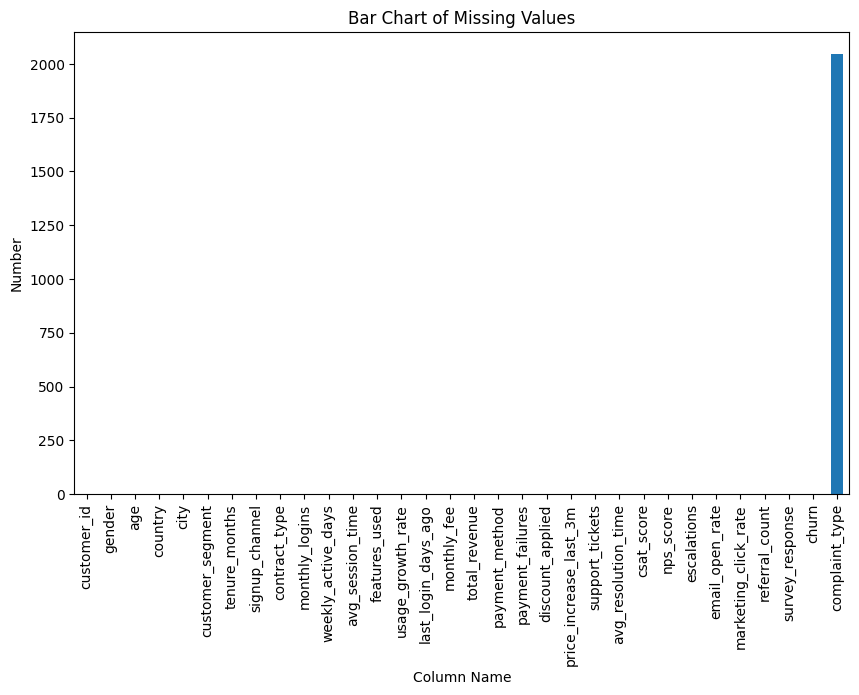

In [56]:
# Display the bar chart of missing values
plt.figure(figsize=(10,6))
df.isnull().sum().sort_values().plot(kind='bar')
plt.title('Bar Chart of Missing Values')
plt.xlabel('Column Name')
plt.ylabel('Number')
plt.show()

In [57]:
# Confirm the column with missing values
column_missing_values = df.columns[df.isnull().any()].tolist()
column_missing_values

['complaint_type']

**Descriptive Statistical Analysis of numerical features**     
**age** and **tenure_months** are roughly spread uniformly. **monthly_logins** are right skewed - most are in the low side. **weekly_active_days** are fairly distributed. **avg_session_time** and **features_used** are slightly right skewed. Distribution is almost normal for **usage_growth_rate** and centered at zero. Declining rate is a churn risk. **last_login_days_ago** is strongly skewed right with most logging in recently but there are cases on the high side. **monthly_fee** is mostly on the low side. **total_revenue** is right skewed and there are many low tenure customers and few long tenure customers. The number of **payment_failures** is low. The number of **support_tickets** is also low but there customers with a number of issues. **avg_resolution_time** is roughly a normal distribution, typical resolution is around 24 units of time. **csat_score** averaged 3.5 although are customers scoring low. **escalations** are very low although there are customers that escalated. **email_open_rate** and **marketing_click_rate** distributions are fairly uniform. **nps_score** distribution is roughly normal slightly skewed left. **referral_count** has a strong right skew and most of the counts are low.

In [58]:
# Examine the descriptive statistical analysis
df.describe().T

count         mean          std     min         25%  \
age                   10000.0    45.906100    16.420416   18.00   32.000000   
tenure_months         10000.0    30.155700    17.099517    1.00   16.000000   
monthly_logins        10000.0    19.672000     9.838003    0.00   13.000000   
weekly_active_days    10000.0     3.479400     2.302283    0.00    1.000000   
avg_session_time      10000.0    15.187890     6.830774    1.00   10.391645   
features_used         10000.0     4.990800     2.211607    1.00    3.000000   
usage_growth_rate     10000.0     0.019423     0.149567   -0.58   -0.080000   
last_login_days_ago   10000.0     9.505200     9.799417    0.00    2.000000   
monthly_fee           10000.0    34.930000    23.785115   10.00   20.000000   
total_revenue         10000.0  1057.018000  1020.148233   10.00  340.000000   
payment_failures      10000.0     0.501000     0.711934    0.00    0.000000   
support_tickets       10000.0     1.206600     1.104554    0.00    0.000000   
avg_resolution_time   10000.0    23.953210     9.956999    1.00   17.082041   
csat_score            10000.0     3.486700     0.978631    1.00    3.000000   
escalations           10000.0     0.294100     0.543171    0.00    0.000000   
email_open_rate       10000.0     0.499610     0.231601    0.10    0.300000   
marketing_click_rate  10000.0     0.253575     0.140532    0.01    0.130000   
nps_score             10000.0    19.110500    38.936619 -100.00   -7.000000   
referral_count        10000.0     0.992200     0.993900    0.00    0.000000   
churn                 10000.0     0.102100     0.302795    0.00    0.000000   

                             50%          75%          max  
age                    46.000000    60.000000    74.000000  
tenure_months          30.000000    45.000000    59.000000  
monthly_logins         20.000000    26.000000    54.000000  
weekly_active_days      3.000000     5.000000     7.000000  
avg_session_time       15.161659    19.882034    41.996411  
features_used           5.000000     6.000000    15.000000  
usage_growth_rate       0.020000     0.120000     0.540000  
last_login_days_ago     6.000000    13.000000    80.000000  
monthly_fee            30.000000    50.000000   100.000000  
total_revenue         720.000000  1440.000000  5900.000000  
payment_failures        0.000000     1.000000     5.000000  
support_tickets         1.000000     2.000000     7.000000  
avg_resolution_time    23.950444    30.758480    61.821878  
csat_score              4.000000     4.000000     5.000000  
escalations             0.000000     1.000000     4.000000  
email_open_rate         0.500000     0.700000     0.900000  
marketing_click_rate    0.250000     0.380000     0.500000  
nps_score              19.000000    46.000000   100.000000  
referral_count          1.000000     2.000000     7.000000  
churn                   0.000000     0.000000     1.000000

**Verify data imbalance**

In [59]:
# Verify class imbalance in the target variable
churn_dist = df['churn'].value_counts(normalize=True)

print(churn_dist)

churn
0    0.8979
1    0.1021
Name: proportion, dtype: float64


### DATA PREPARATION  
  
The column **customer_id** is dropped because it contains unique values which will not affect the performance of the model.     
There are no duplicate rows.      
Missing values in the column **complaint_type** are imputed because the percentage of missing values is not excessively high otherwise the column would have been dropped. The mode of the column is used to impute missing values.       
Leading and lagging white spaces are removed from categorical columns.      
Improper names in the column **complaint_type** elements are replaced with the correct ones.     
Outliers in numerical features are removed using the interquartile range (IQR) rule.

**Drop Column**    
Drop **customer_id** - it contains unique values that will not affect the analysis.

In [60]:
# Drop the column 'customer_id'
df = df.drop(columns=['customer_id'])
# Check the latest info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  10000 non-null  object 
 1   age                     10000 non-null  int64  
 2   country                 10000 non-null  object 
 3   city                    10000 non-null  object 
 4   customer_segment        10000 non-null  object 
 5   tenure_months           10000 non-null  int64  
 6   signup_channel          10000 non-null  object 
 7   contract_type           10000 non-null  object 
 8   monthly_logins          10000 non-null  int64  
 9   weekly_active_days      10000 non-null  int64  
 10  avg_session_time        10000 non-null  float64
 11  features_used           10000 non-null  int64  
 12  usage_growth_rate       10000 non-null  float64
 13  last_login_days_ago     10000 non-null  int64  
 14  monthly_fee             10000 non-null 

In [61]:
# Remove any leading and trailing white spaces from categorical columns
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.strip())

**Missing Values**     
The missing values in the column **complaint_type** are filled with the column mode **Technical**.

In [62]:
# Calculate the  percentage of missing values in the 'complaint_type' column
num_missing_values = df['complaint_type'].isnull().sum()

print(f"The percentage of missing values in the column 'complaint_type' is {num_missing_values/df.shape[0]*100: .2f}%")

The percentage of missing values in the column 'complaint_type' is  20.45%


In [63]:
# Verify the value counts for column 'complaint_type'
val_count_complaint_type = df['complaint_type'].value_counts(normalize=True)
val_count_complaint_type

complaint_type
Technical    0.439723
Billing      0.305091
Service      0.255185
Name: proportion, dtype: float64

In [64]:
# Replace the missing values with the column mode
mode_column = df['complaint_type'].mode()
df['complaint_type'] = df['complaint_type'].fillna(str(mode_column))

In [65]:
# Confirm the replacement of missing values
total_missing_values = df.isnull().sum().sum()

print(f'The total number of missing values is now {total_missing_values}.')

The total number of missing values is now 0.


In [66]:
# Re-verify the value counts for column 'complaint_type'
val_count_complaint_type = df['complaint_type'].value_counts(normalize=True)
val_count_complaint_type

complaint_type
Technical                                              0.3498
Billing                                                0.2427
0    Technical\nName: complaint_type, dtype: object    0.2045
Service                                                0.2030
Name: proportion, dtype: float64

In [67]:
# Replace '0    Technical\nName: complaint_type, dtype: object' with 'Technical'
df['complaint_type'] = df['complaint_type'].replace({'0    Technical\nName: complaint_type, dtype: object':'Technical'})

In [68]:
# Re-verify the value counts for column 'complaint_type'
val_count_complaint_type = df['complaint_type'].value_counts(normalize=True)
val_count_complaint_type

complaint_type
Technical    0.5543
Billing      0.2427
Service      0.2030
Name: proportion, dtype: float64

In [69]:
# Sanity check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  10000 non-null  object 
 1   age                     10000 non-null  int64  
 2   country                 10000 non-null  object 
 3   city                    10000 non-null  object 
 4   customer_segment        10000 non-null  object 
 5   tenure_months           10000 non-null  int64  
 6   signup_channel          10000 non-null  object 
 7   contract_type           10000 non-null  object 
 8   monthly_logins          10000 non-null  int64  
 9   weekly_active_days      10000 non-null  int64  
 10  avg_session_time        10000 non-null  float64
 11  features_used           10000 non-null  int64  
 12  usage_growth_rate       10000 non-null  float64
 13  last_login_days_ago     10000 non-null  int64  
 14  monthly_fee             10000 non-null 

**Duplicate Rows**

In [70]:
# Verify duplicates, if any
duplicates = len(df[df.duplicated()])

print(f'There are {duplicates} duplicate rows.')

There are 0 duplicate rows.


**Distribution of categorical columns**     
There are no elements in categorial columns that need to be treated as an outlier and be removed.

In [71]:
# Verify the distributions for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_cols:
    value_count_column = df[i].value_counts(normalize=True)
    print(f'The value count for column {value_count_column} \n')

The value count for column gender
Male      0.5013
Female    0.4987
Name: proportion, dtype: float64 

The value count for column country
Bangladesh    0.1494
Canada        0.1488
USA           0.1442
India         0.1427
Australia     0.1400
UK            0.1382
Germany       0.1367
Name: proportion, dtype: float64 

The value count for column city
London      0.1518
Sydney      0.1471
Dhaka       0.1459
Delhi       0.1402
Berlin      0.1386
New York    0.1385
Toronto     0.1379
Name: proportion, dtype: float64 

The value count for column customer_segment
Individual    0.5984
SME           0.3029
Enterprise    0.0987
Name: proportion, dtype: float64 

The value count for column signup_channel
Web         0.5036
Mobile      0.2960
Referral    0.2004
Name: proportion, dtype: float64 

The value count for column contract_type
Monthly      0.4967
Quarterly    0.3050
Yearly       0.1983
Name: proportion, dtype: float64 

The value count for column payment_method
Card             0.5955
Pa

In [72]:
# Verify the age distribution (18 - 74 years old)
distribution_age = pd.Series(df['age'].unique().tolist()).sort_values()
distribution_age

37    18
43    19
15    20
39    21
12    22
6     23
2     24
22    25
17    26
30    27
13    28
31    29
40    30
29    31
14    32
55    33
19    34
42    35
5     36
7     37
21    38
41    39
16    40
26    41
52    42
20    43
8     44
50    45
18    46
47    47
36    48
3     49
49    50
34    51
27    52
44    53
11    54
24    55
38    56
1     57
35    58
25    59
10    60
32    61
56    62
33    63
53    64
4     65
54    66
46    67
0     68
51    69
9     70
45    71
28    72
48    73
23    74
dtype: int64

**Box Plots of numerical features before removal of outliers**     

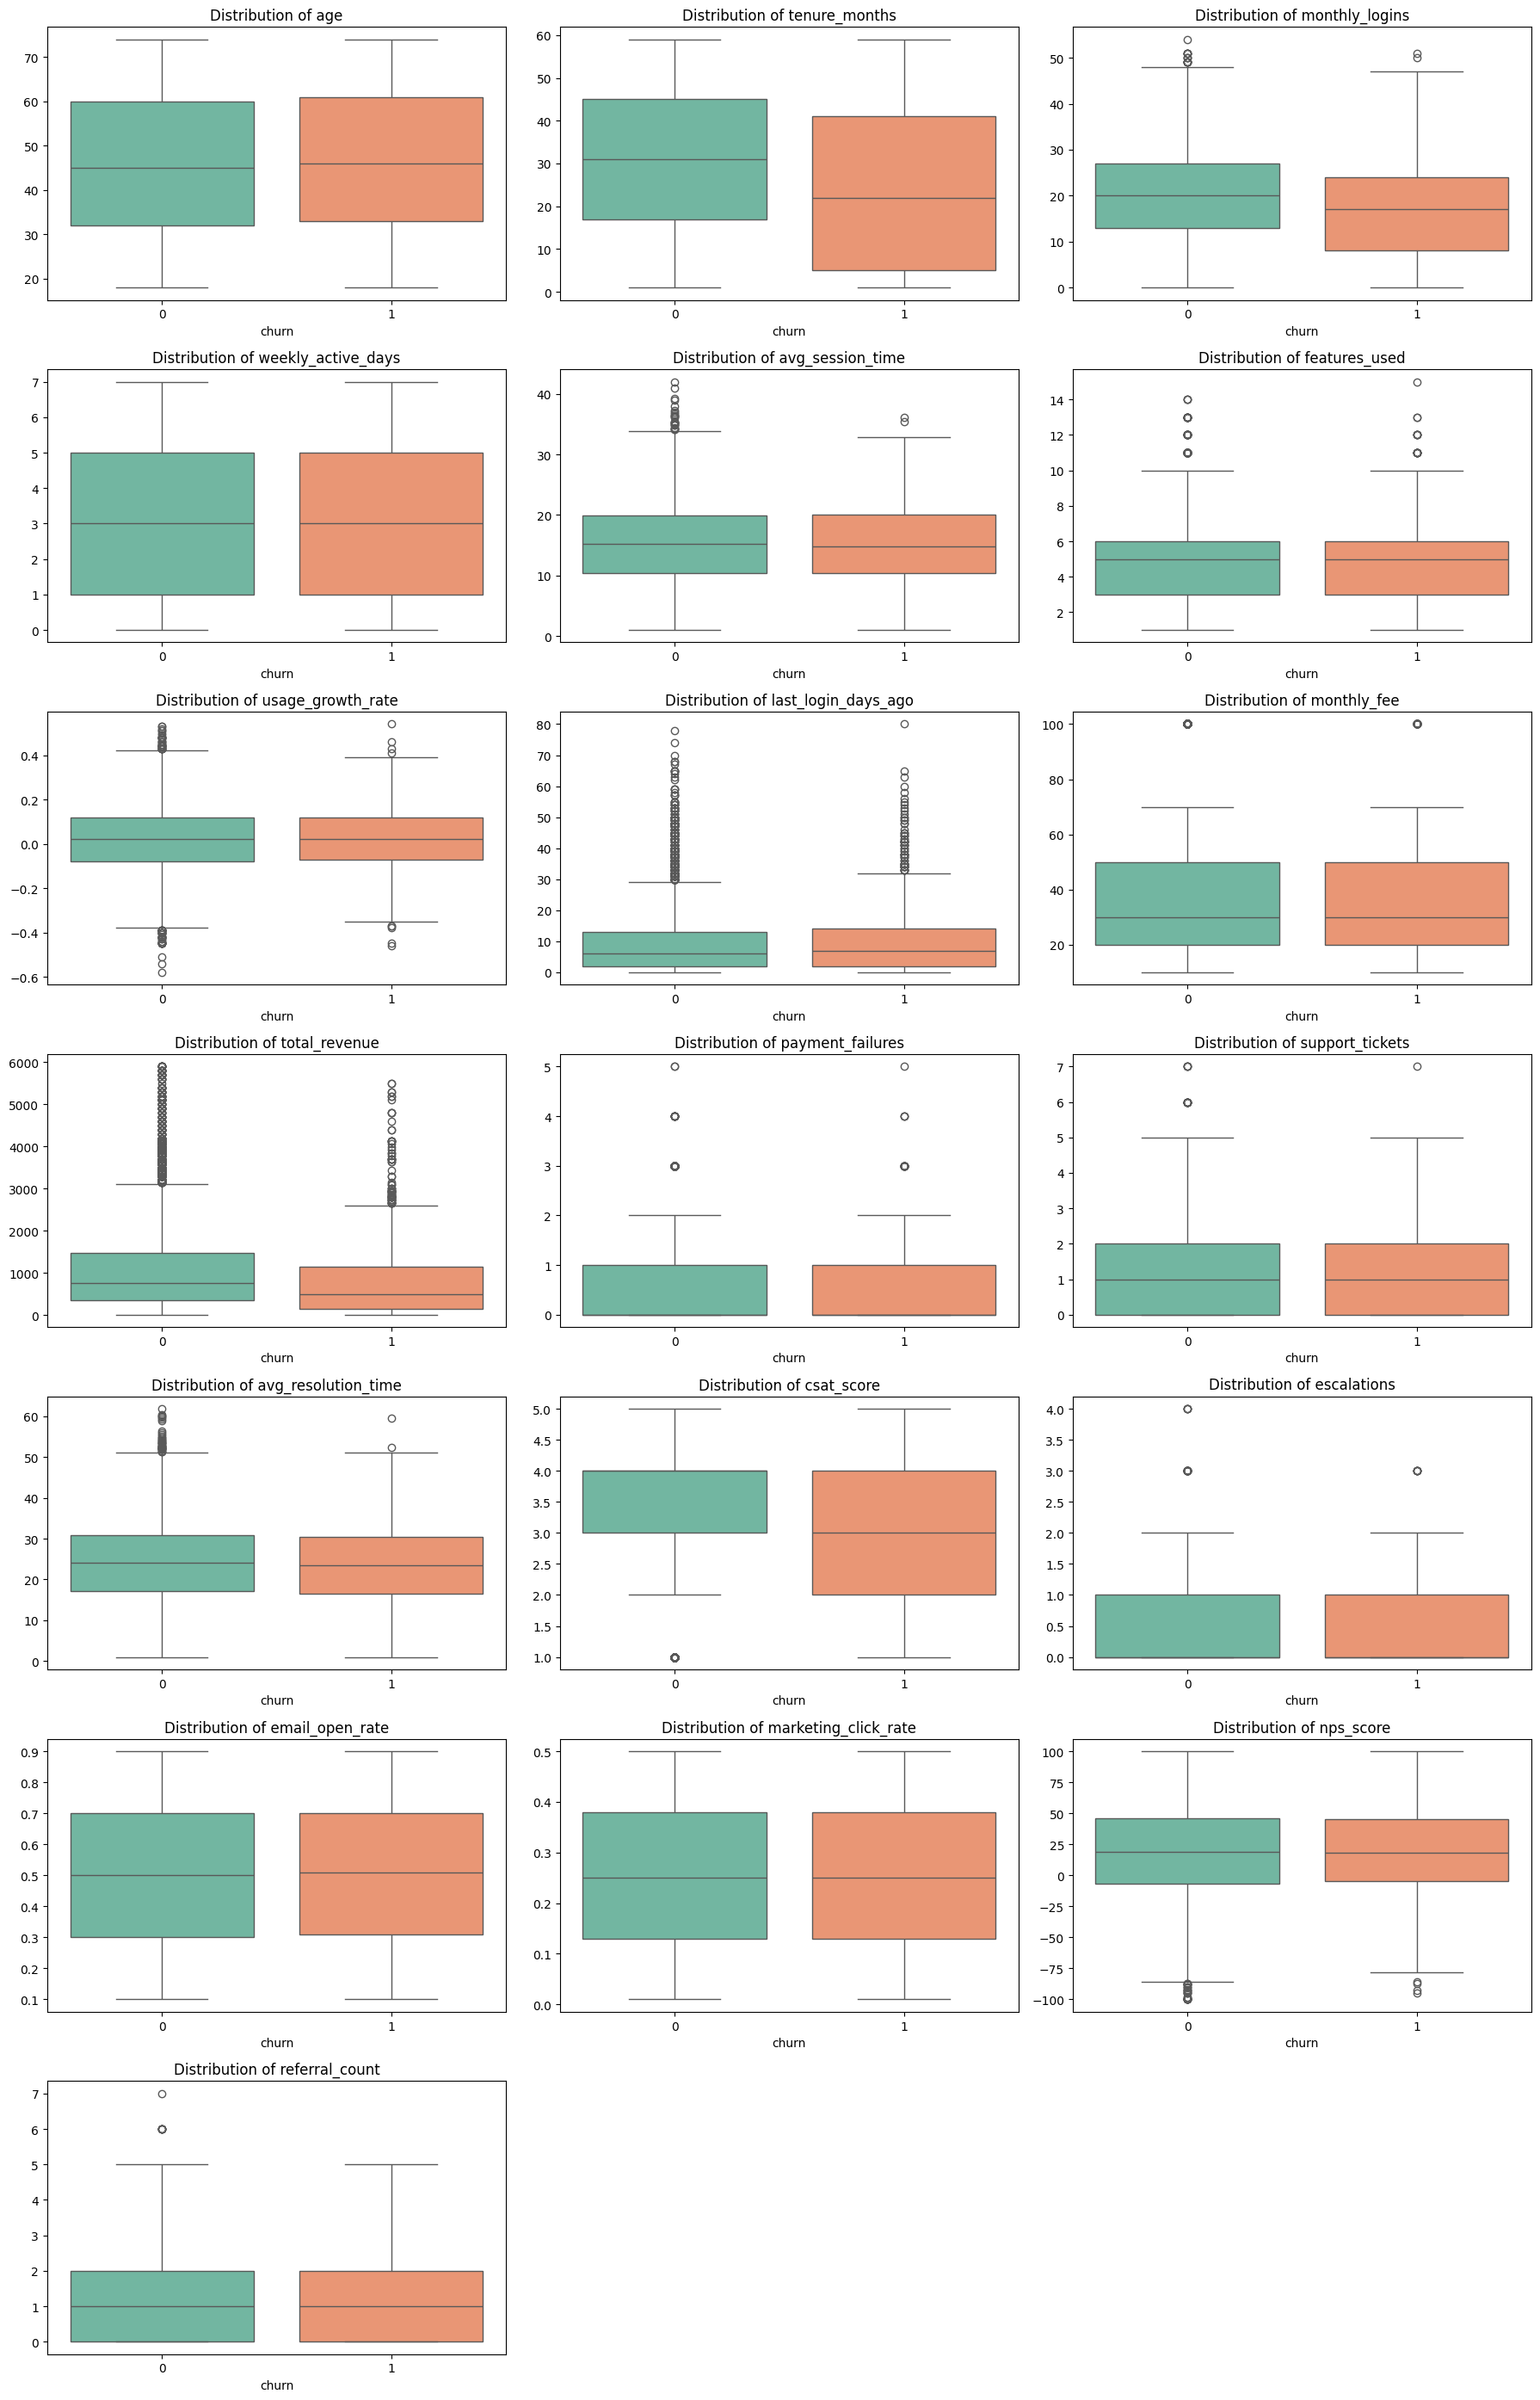

In [73]:
# Display box plots of numerical features in subplots of 3 columns before removal of outliers
numerical_columns = ['age','tenure_months','monthly_logins','weekly_active_days','avg_session_time','features_used',
                     'usage_growth_rate','last_login_days_ago','monthly_fee','total_revenue','payment_failures',
                     'support_tickets','avg_resolution_time','csat_score','escalations','email_open_rate',
                     'marketing_click_rate','nps_score','referral_count']
n_features = len(numerical_columns)
n_cols = 3
n_rows = math.ceil(n_features/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df['churn'], y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Outliers**     
Outliers are removed from numeric features using interquartile range (IQR) rule.

In [74]:
# Removal of outliers from numeric features using IQR
outliers_numeric_list = ['age','tenure_months','monthly_logins','weekly_active_days','avg_session_time','features_used',
                         'usage_growth_rate','last_login_days_ago','monthly_fee','total_revenue','payment_failures',
                         'support_tickets','avg_resolution_time','csat_score','escalations','email_open_rate',
                         'marketing_click_rate','nps_score','referral_count']
for col in outliers_numeric_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [75]:
# Verify the reduction of data rows with the removal of numeric outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7937 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  7937 non-null   object 
 1   age                     7937 non-null   int64  
 2   country                 7937 non-null   object 
 3   city                    7937 non-null   object 
 4   customer_segment        7937 non-null   object 
 5   tenure_months           7937 non-null   int64  
 6   signup_channel          7937 non-null   object 
 7   contract_type           7937 non-null   object 
 8   monthly_logins          7937 non-null   int64  
 9   weekly_active_days      7937 non-null   int64  
 10  avg_session_time        7937 non-null   float64
 11  features_used           7937 non-null   int64  
 12  usage_growth_rate       7937 non-null   float64
 13  last_login_days_ago     7937 non-null   int64  
 14  monthly_fee             7937 non-null   int64

**Box Plots of numerical features after removal of outliers**     
When the churn median line is lower than the no churn median line, churn is more likely. For example, the lower values of the following features indicate likelihood of churn:     
**tenure_months**, **monthly_logins**, **weekly_active_days**, **avg_session_time**, **total_revenue**, **csat_score**, **marketing_click_rate**, **nps_score**      
The taller churn boxes in tenure months and csat mean more variability; the short boxes mean that the customers are similar to each other.
The points beyond the whiskers are outliers. These remaining outliers may be allowed to remain to conserve data.
Overlapping churn and no churn boxes indicate that the feature might not be a good predictor. Separation of these churn and no churn boxes would be a strong signal for good predictors like tenure months, monthly logins, total revenue and csat score.

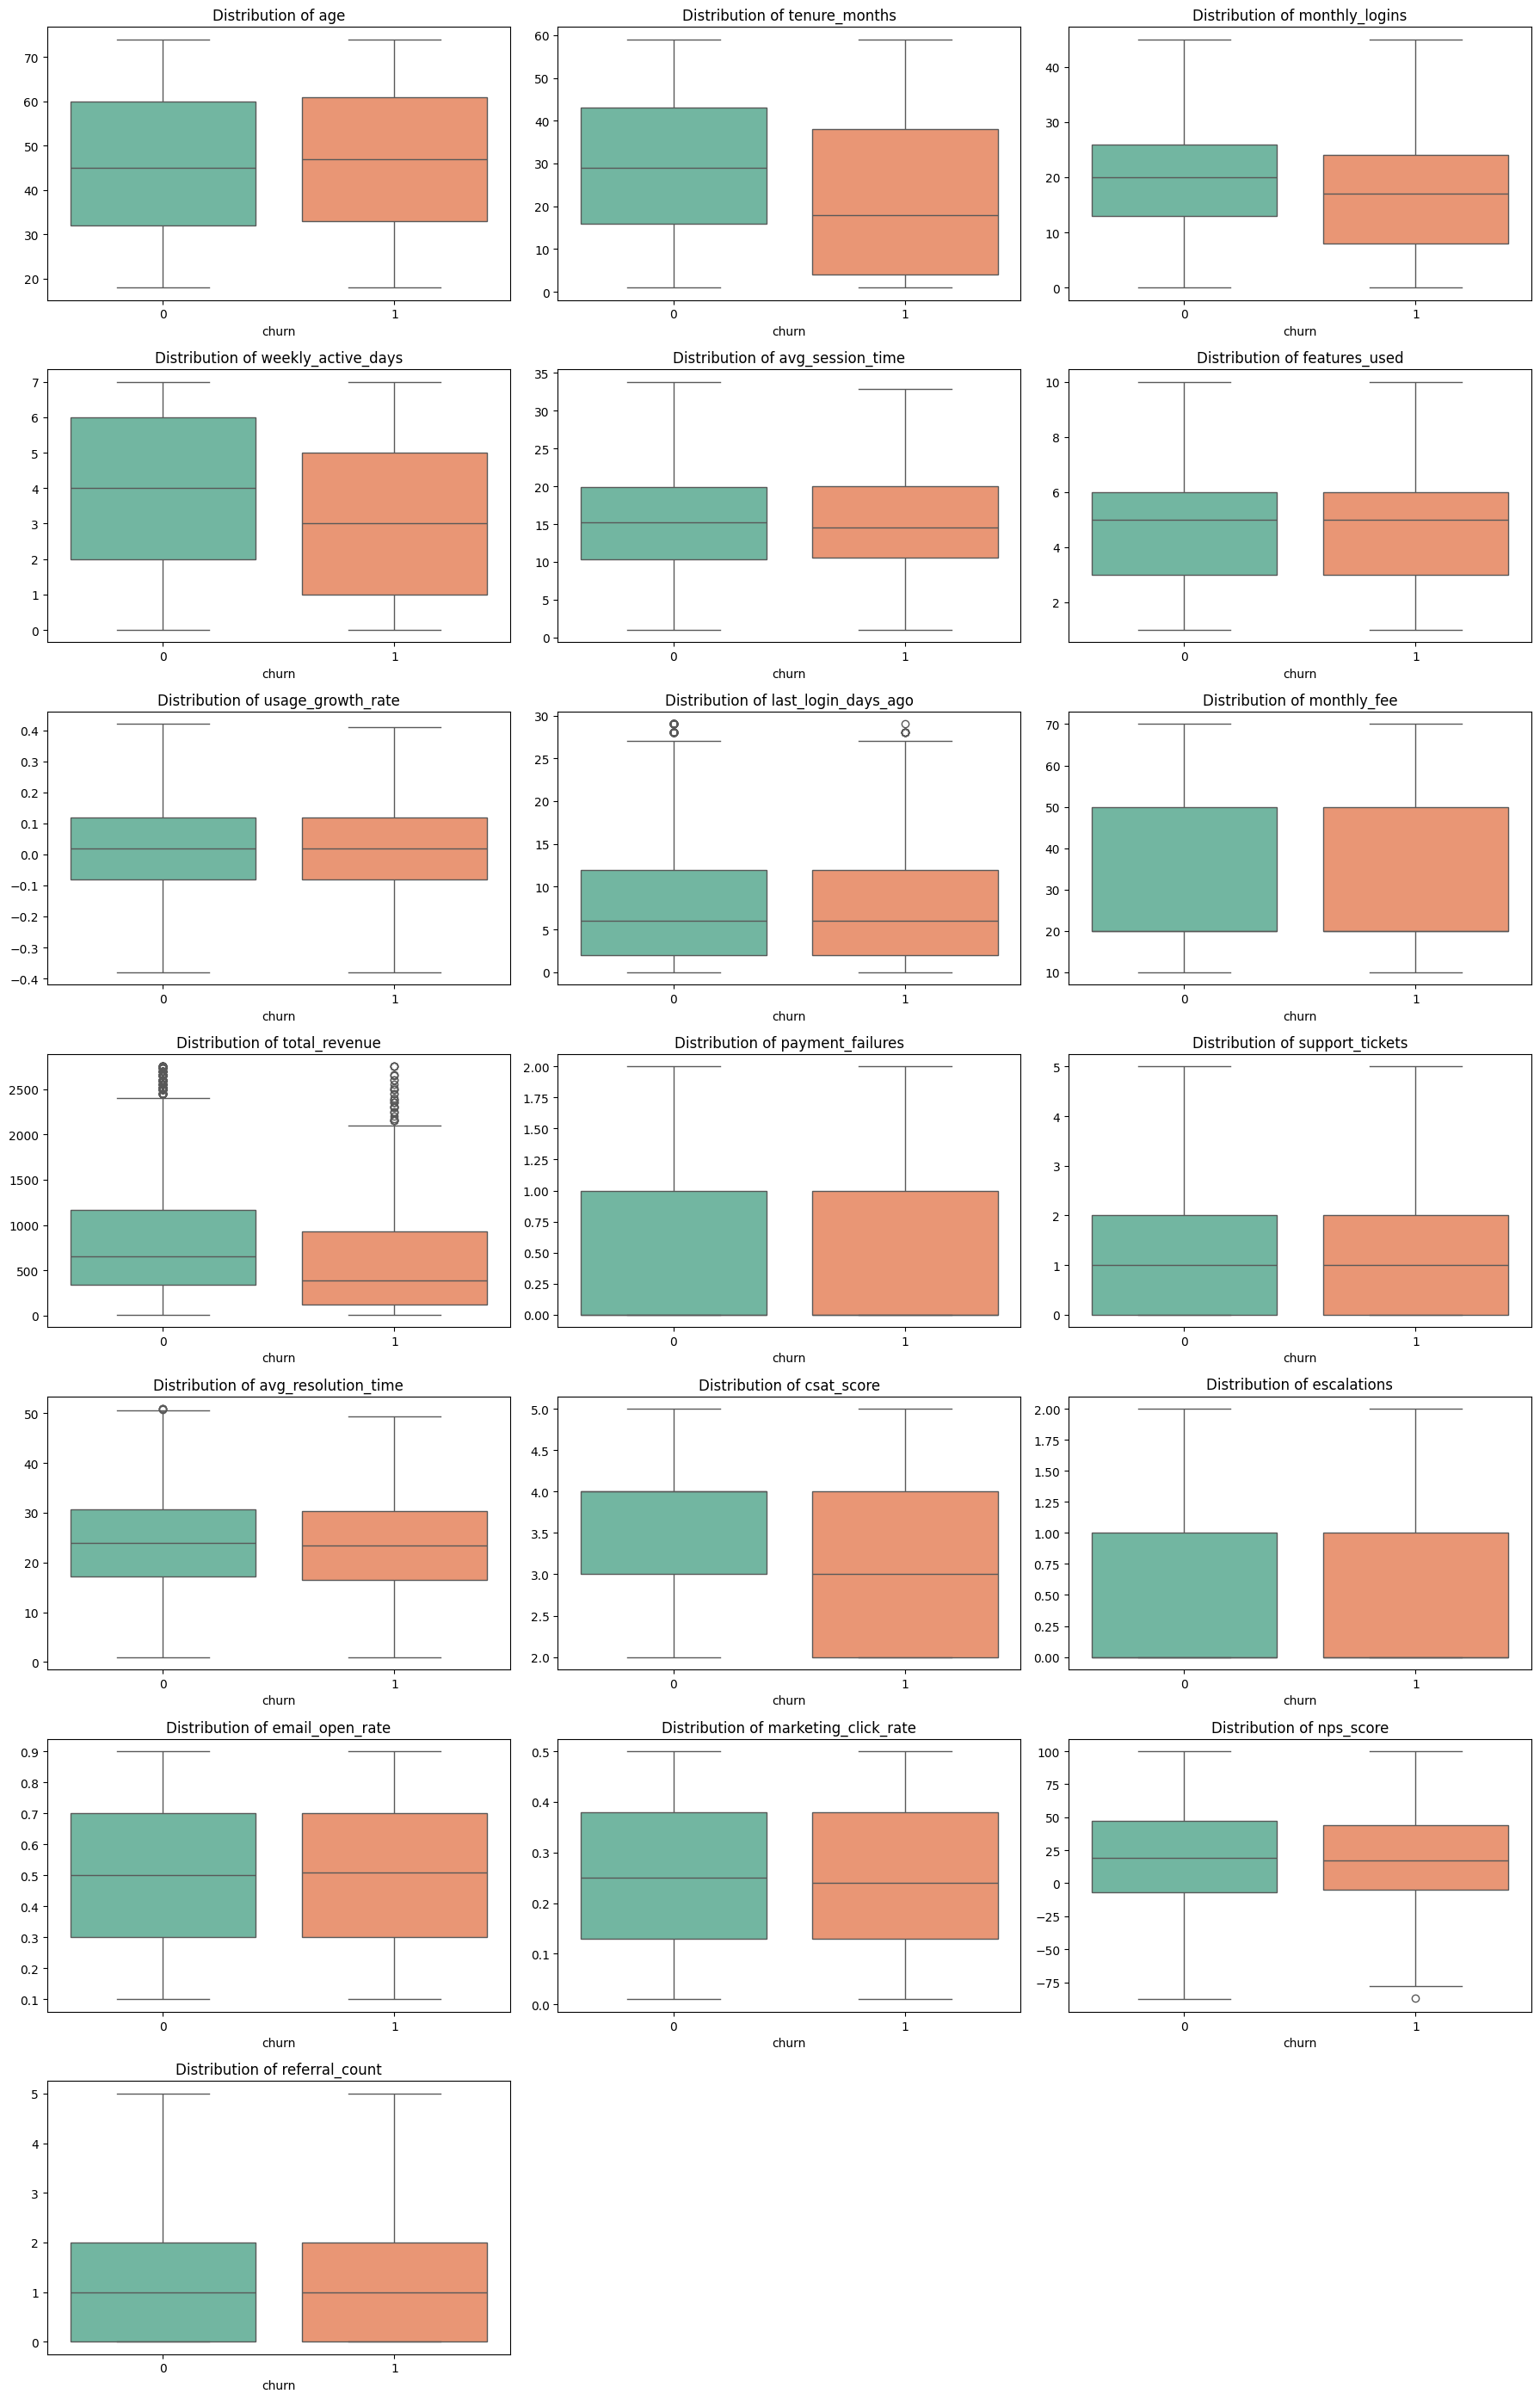

In [76]:
# Re-display box plots of numerical features after removal of outliers
numerical_columns = ['age','tenure_months','monthly_logins','weekly_active_days','avg_session_time','features_used',
                     'usage_growth_rate','last_login_days_ago','monthly_fee','total_revenue','payment_failures',
                     'support_tickets','avg_resolution_time','csat_score','escalations','email_open_rate',
                     'marketing_click_rate','nps_score','referral_count']
n_features = len(numerical_columns)
n_cols = 3
n_rows = math.ceil(n_features/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df['churn'], y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [77]:
# Display features medians of no churn (0) and churn (1)
medians = df.groupby('churn')[['age','tenure_months','monthly_logins','weekly_active_days','avg_session_time','features_used',
                               'usage_growth_rate','last_login_days_ago','monthly_fee','total_revenue','payment_failures',
                               'support_tickets','avg_resolution_time','csat_score','escalations','email_open_rate',
                               'marketing_click_rate','nps_score','referral_count']].median().T
medians

churn                          0           1
age                    45.000000   47.000000
tenure_months          29.000000   18.000000
monthly_logins         20.000000   17.000000
weekly_active_days      4.000000    3.000000
avg_session_time       15.179032   14.549000
features_used           5.000000    5.000000
usage_growth_rate       0.020000    0.020000
last_login_days_ago     6.000000    6.000000
monthly_fee            20.000000   20.000000
total_revenue         650.000000  390.000000
payment_failures        0.000000    0.000000
support_tickets         1.000000    1.000000
avg_resolution_time    23.960272   23.441194
csat_score              4.000000    3.000000
escalations             0.000000    0.000000
email_open_rate         0.500000    0.510000
marketing_click_rate    0.250000    0.240000
nps_score              19.000000   17.500000
referral_count          1.000000    1.000000

**Stacked Bars of categorical features (in percentages)**     
Based on the color ratios of the stacked bars: **males** have slightly more churn; the higher churns are in **Germany**, **UK**, **Australia** and **USA**; **New York**, **Dhaka** and **Toronto** are slightly ahead in churns; **SME**, **Referral**, **Quarterly/Monthly** and **Card** are slightly ahead in churns as well; the following are also slightly ahead: **no discount applied**, **no price increase last 3m** and **technical/billing** complaint type. **Unsatisfied** survey response is way ahead in churns. **Yearly** has lower churn than either **Monthly** or **Quarterly**.

In [78]:
# Define a function to plot stacked bars with annotated percentages of churn status
def plot_stacked_bars(df, features, target='churn', n_cols=3):
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))
    axes_flat = axes.flatten()

    for i, col in enumerate(features):
        ax = axes_flat[i]
        cross_tab = pd.crosstab(df[col], df[target], normalize='index')
        cross_tab.plot(kind='barh', stacked=True, ax=ax, color=['#7294ac','#81c79d'], legend=False)
        for p in ax.patches:
            width = p.get_width()
            if width > 0.05:
                x_pos = p.get_x() + width / 2
                y_pos = p.get_y() + p.get_height() / 2
                ax.text(x_pos, y_pos, f'{width*100:.1f}%',
                        va='center', ha='center',
                        color='white', fontweight='bold', fontsize=11)
        ax.set_title(f'Churn Distribution: {col}', fontsize=14)
        ax.set_xlabel('Proportion')
        ax.set_ylabel('')

    handles, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02),
                ncol=2, title=f'{target.capitalize()} Status', fontsize=12)

    for j in range(i+1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

In [79]:
# Review the churn distribution
churn_dist = df['churn'].value_counts(normalize=True)

print(churn_dist)

churn
0    0.906262
1    0.093738
Name: proportion, dtype: float64


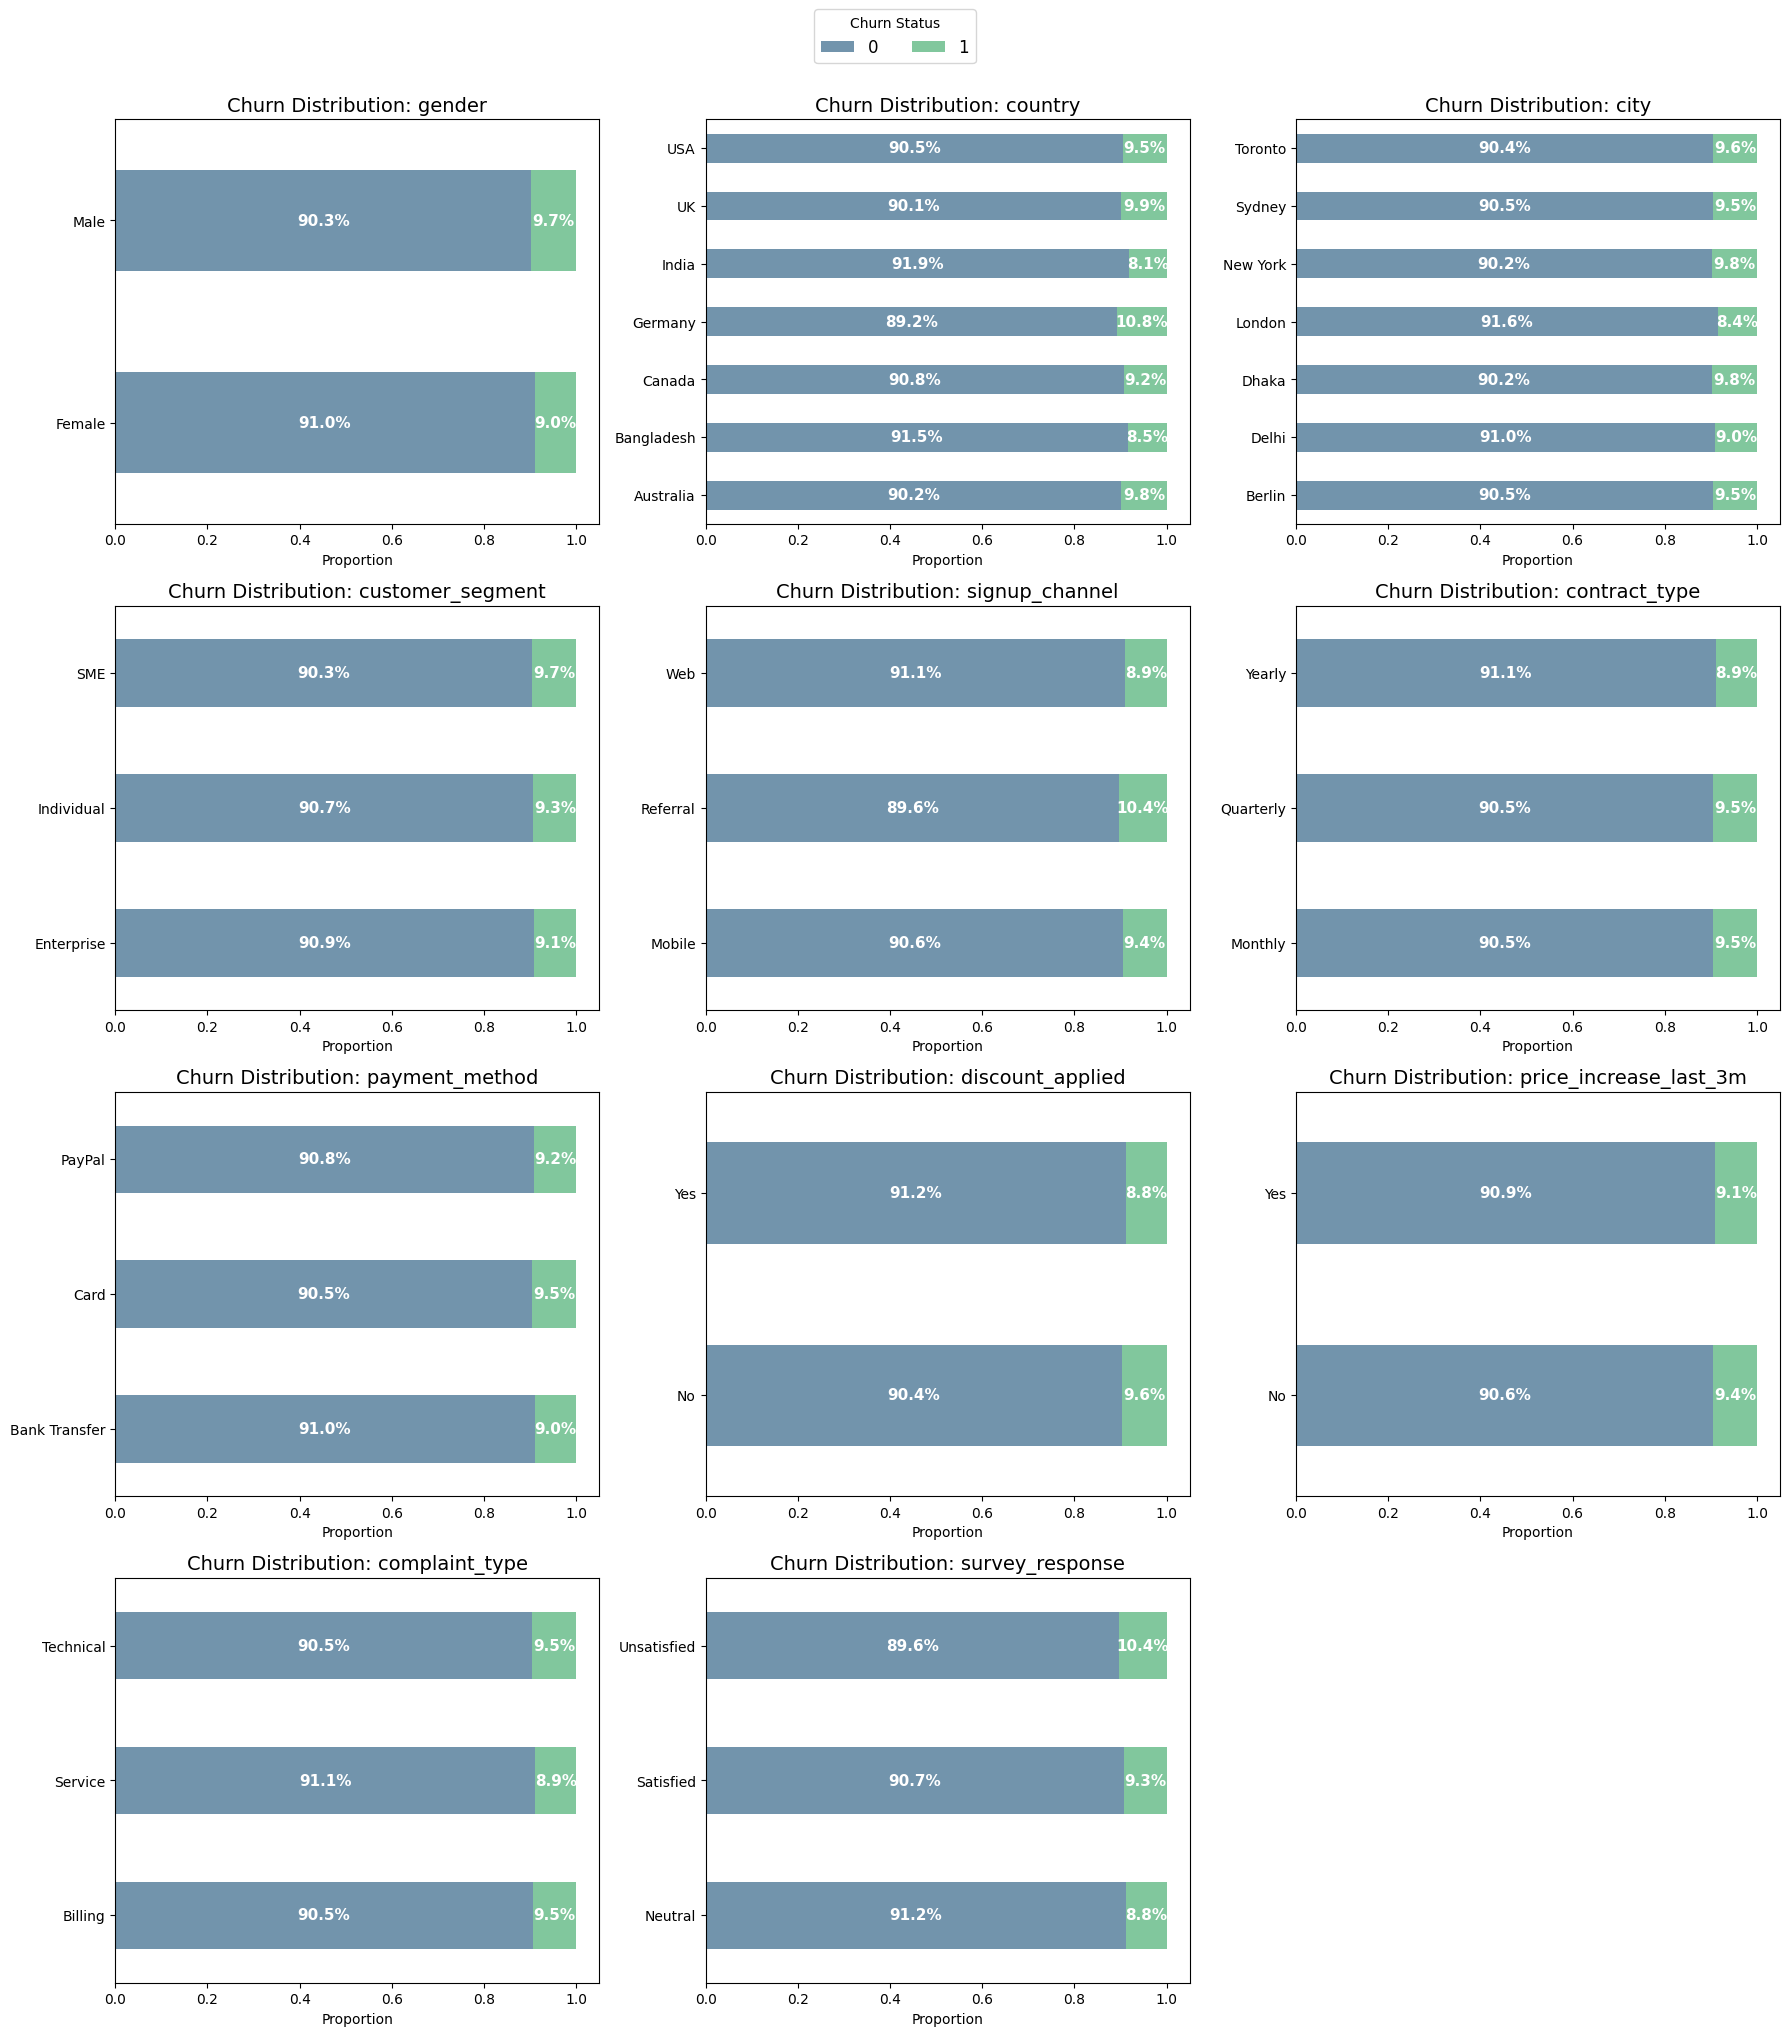

In [80]:
# Run the plot function on categorical columns
categorical_columns = ['gender', 'country', 'city', 'customer_segment', 'signup_channel', 'contract_type', 'payment_method',
                       'discount_applied','price_increase_last_3m', 'complaint_type', 'survey_response']
plot_stacked_bars(df, categorical_columns)

**HISTOGRAMS**     
**Age** - roughly uniform distribution between ages 18 - 74 years old     
**Tenure months** - roughly uniform distribution over 60 months, there are slightly less users with low tenure (newer customers are a churn risk)     
**Monthly logins** - right skewed distribution, most users login 10-25 times a month (low login frequency is a churn warning signal)    
**Weekly active days** - fairly evenly distributed (users active less than 2 days a week are likely churn risks)     
**Avg session time** - roughly normal distribution, most users spend a moderate amount of time, very short sessions may signal disengagement     
**Features used** - right skewed distribution, most users use around 3-7 features, feature usage correlates with higher retention     
**Usage growth rate** - approximately normal distribution, centered at 0 (negative values indicate declining engagement and higher churn risk and while positive values show growing engagement and lower churn risk)     
**Last login days ago** - strong right skew, most customers logged in recently and there is a long tail of inactive users (30-80 days) (more days would signal higher churn probability)     
**Monthly fee** - discrete spikes are pricing tiers and most are on the low side     
**Total revenue** - right skewed, there are many low-lifetime-value customers and few high-value, long-tenure customers     
**Payment failures** - most customers pay and there is a small group that fail to pay, failures often precede involuntary churn     
**Support tickets** - majority have 0-1 ticket and few customers have many issues, more tickets would lead to friction or dissatisfaction     
**Avg resolution time** - roughly normal distribution, typical resolution is 20-30 units of time (slow support would drive churn even if issues are       resolved)             
**Csat score** - most customers rate 3-4 (1-2 are danger zones), the coefficient would be negative - higher satisfaction means lower churn     
**Escalations** - majority of customers never escalate but a small group escalates multiple times (escalations indicate failed experiences and are very predictive of churn)     
**Email open rate** - distribution is fairly uniform, both low engagement and high engagement users exist (low open rate would reveal disengagement and result to higher churn risk while high open rate means engagement customers and lower churn)     
**Marketing click rate** - roughly uniform although slightly sparse at the extremes (clicking is a stronger engagement signal than opening)     
**Nps score** - bell shaped distribution, healthy mix of detractors (much more likely to churn), passives and promoters (highly retained)     
**Referral count** - strong right skew, mostly at 0-1, the coefficient for this feature would be strong and negative (customers with 2+ referrals are very unlikely to churn)     
**Churn** - most customers stay and a minority churn, need to catch churners early by focusing on a good balance of recall and precision

In [81]:
# Define a function to plot histograms for numeric columns
def plot_grid_histograms(df, column_list, main_title='Numeric Features Distribution Analysis'):
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25))
    fig.suptitle(main_title, fontsize=18, fontweight='bold', y=0.98)
    axes = axes.flatten()
    for i, col_name in enumerate(column_list):
        ax = axes[i]
        sns.histplot(df[col_name], kde=True, ax=ax)
        col_mean = df[col_name].mean()
        col_median = df[col_name].median()
        ax.axvline(col_mean, color='red', linestyle='--', label='Mean')
        ax.axvline(col_median, color='green', linestyle='-', label='Median')
        ax.set_title(f'Distribution of {col_name}', fontsize=12, pad=10)
        ax.set_xlabel('Value Range', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend(fontsize=8)
    for j in range(i+1, len(axes)):
        axes[j].set_axis_off()
    plt.tight_layout(rect=[0,0.03,1,0.97])
    plt.show()

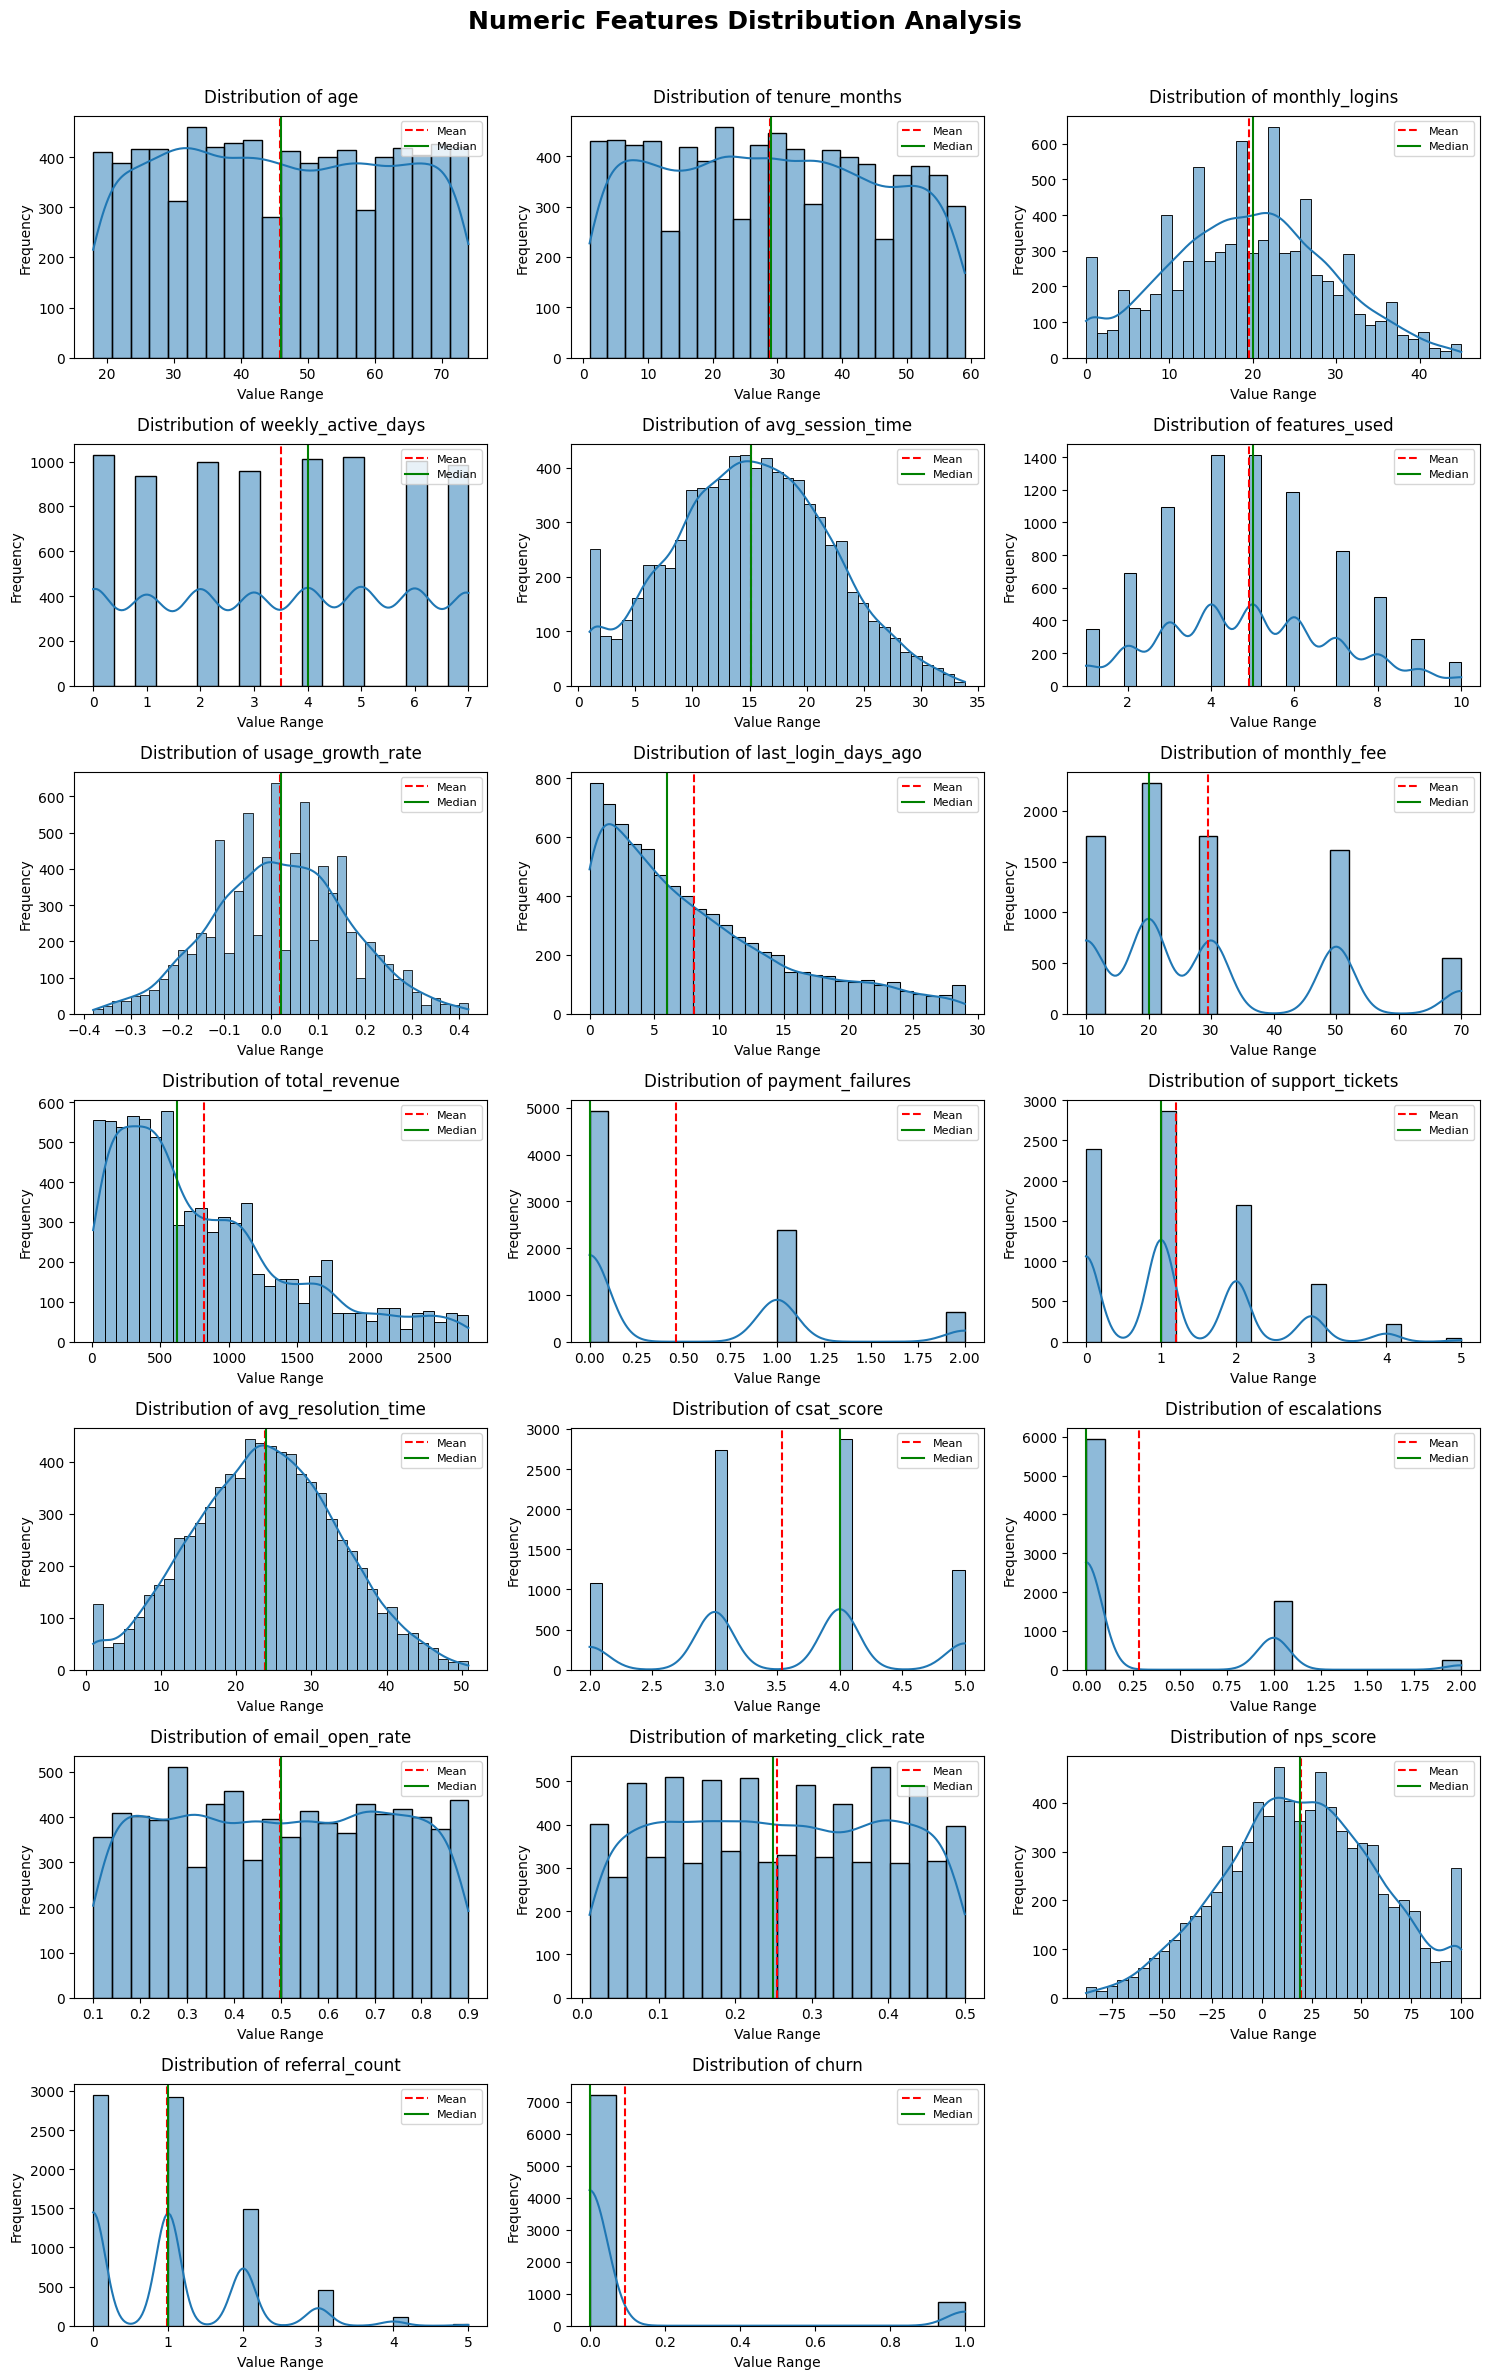

In [82]:
# Plot the histograms for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

plot_grid_histograms(df, numeric_cols)

In [83]:
# List the numeric columns for the heat map
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'tenure_months',
 'monthly_logins',
 'weekly_active_days',
 'avg_session_time',
 'features_used',
 'usage_growth_rate',
 'last_login_days_ago',
 'monthly_fee',
 'total_revenue',
 'payment_failures',
 'support_tickets',
 'avg_resolution_time',
 'csat_score',
 'escalations',
 'email_open_rate',
 'marketing_click_rate',
 'nps_score',
 'referral_count',
 'churn']

**HEAT MAP of numeric features**     
For readability, the significant correlations are highlighted in the heat map following the first heat map.

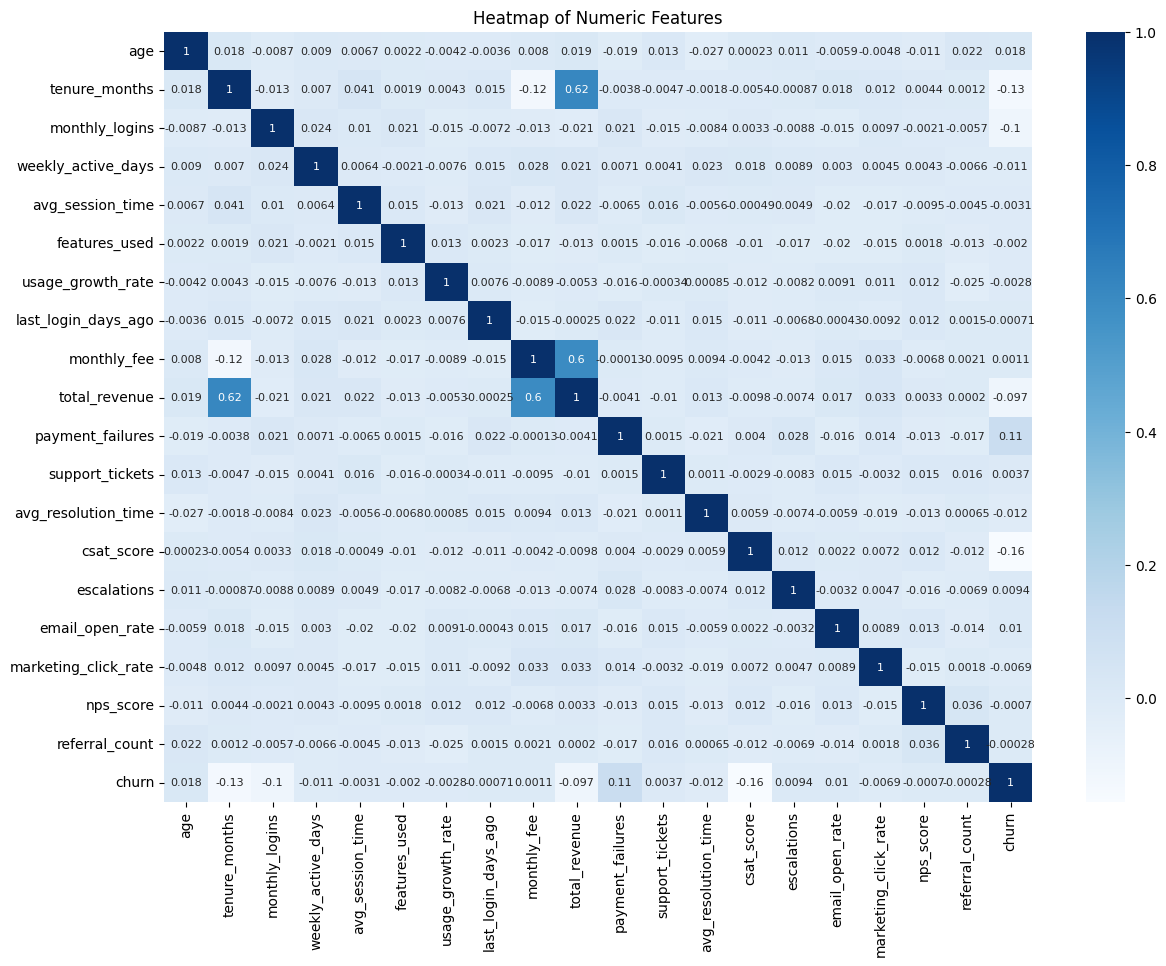

In [84]:
# Display the heat map of numeric features
df_numeric = df[numeric_cols]
plt.figure(figsize=(14,10))
ax = sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap='Blues',
    annot_kws={"size": 8});
plt.title(f'Heatmap of Numeric Features')
plt.show()

**HEAT MAP highlighting significant correlations with 'churn'**     
Five (5) features are observed to have significant correlations with 'churn' as follows:
**payment_failures** (0.11) has a positive correlation with 'churn'(the more of these features, the more likely is the churn)

**tenure_months** (-0.13), **monthly_logins** (-0.10), **total_revenue** (-0.10), **csat_score** (-0.16) have a negative correlations with 'churn' (the more of these features, the less likely is the churn)     

Also, **total_revenue** is positively correlated with **tenure_months** (0.62) and **monthly_fee** (0.60).

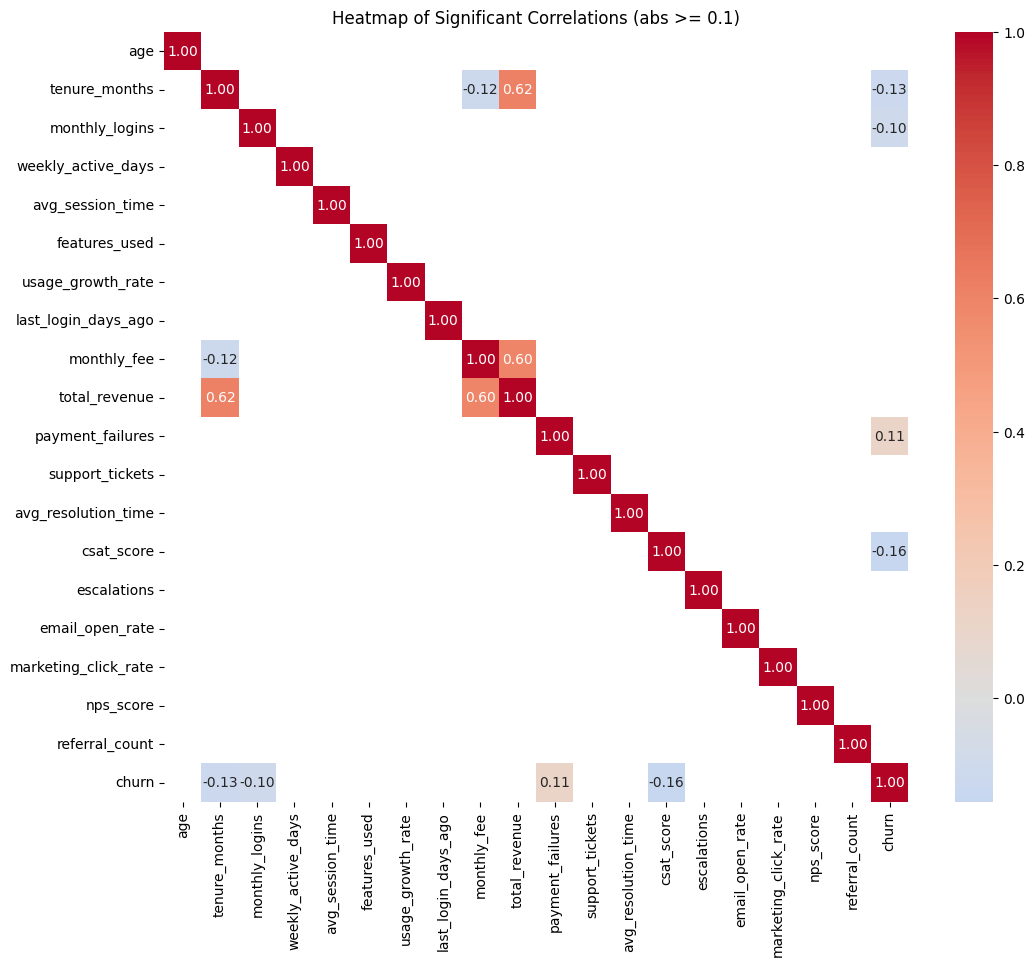

In [85]:
# Display heat map highlighting correlations >= threshold
corr_matrix = df_numeric.corr()
threshold = 0.1
sig_corr = corr_matrix[(corr_matrix.abs() >= threshold)]
plt.figure(figsize=(12,10))
sns.heatmap(sig_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title(f'Heatmap of Significant Correlations (abs >= {threshold})')
plt.show()

In [86]:
# Select the top 7 features for the pair plot analysis including 'churn'
corr = df.corr(numeric_only=True)['churn'].abs().sort_values(ascending=False)
top_features = corr.head(7).index.tolist()
top_features

['churn',
 'csat_score',
 'tenure_months',
 'payment_failures',
 'monthly_logins',
 'total_revenue',
 'age']

**PAIR PLOT Analysis**     
**Csat score** - **diagonal** - churns are concentrated at lower scores (1-2) while non-churns dominate at higher scores (4-5). vs **Tenure months** - long tenure customers tend to have higher Csat score, churners with long tenure usually have lower Csat than non-churners. vs **Payment failures** - customers with payment failures have low Csat scores. vs **Monthly logins** - customers with fewer monthly logins churn, most who churned scored 2. vs **Total revenue** - most who churned also scored 2. vs **Age** - most churners score 2 as well, at the low end of the age distribution

**Tenure months** - **diagonal** - there are more churners at low tenure (new customers) but still present across all tenures. vs **Payment failures** - at payment failures of 3, churn is spread over the tenure months. vs **Monthly logins** - churn is present over the spead of tenure months with lower monthly logins and with lower tenure months, churn is present over the spread of monthly logins. vs **Total revenue** - revenue increases with tenure and there is more churn at lower revenue. vs **Age** - churners are fairly distributed with some at the lower end of tenure months

**Payment failures** - **diagonal** - most customers have 0-1 failures but churn happens at 2+ failures. vs **Monthly logins** - churn happens at higher payment failures and lower monthly logins.  vs **Total revenue** - high payment failures have more churn especially at lower revenue. vs **Age** - churners are at payment failure 2 and mostly younger     

**Monthly logins** - **diagonal** - churners skew left (lower logins). vs **Total revenue** - there is churn at low monthly logins and low revenue. vs **Age** - churners crowd the low end of monthly logins and younger

**Total revenue** - **diagonal** - strong right skew, churners mostly at lower revenue. vs **Age** - while fairly distributed, churners gravitate towards low total revenue

**Age** - **diagonal** - churn is roughly uniform over the age distribution


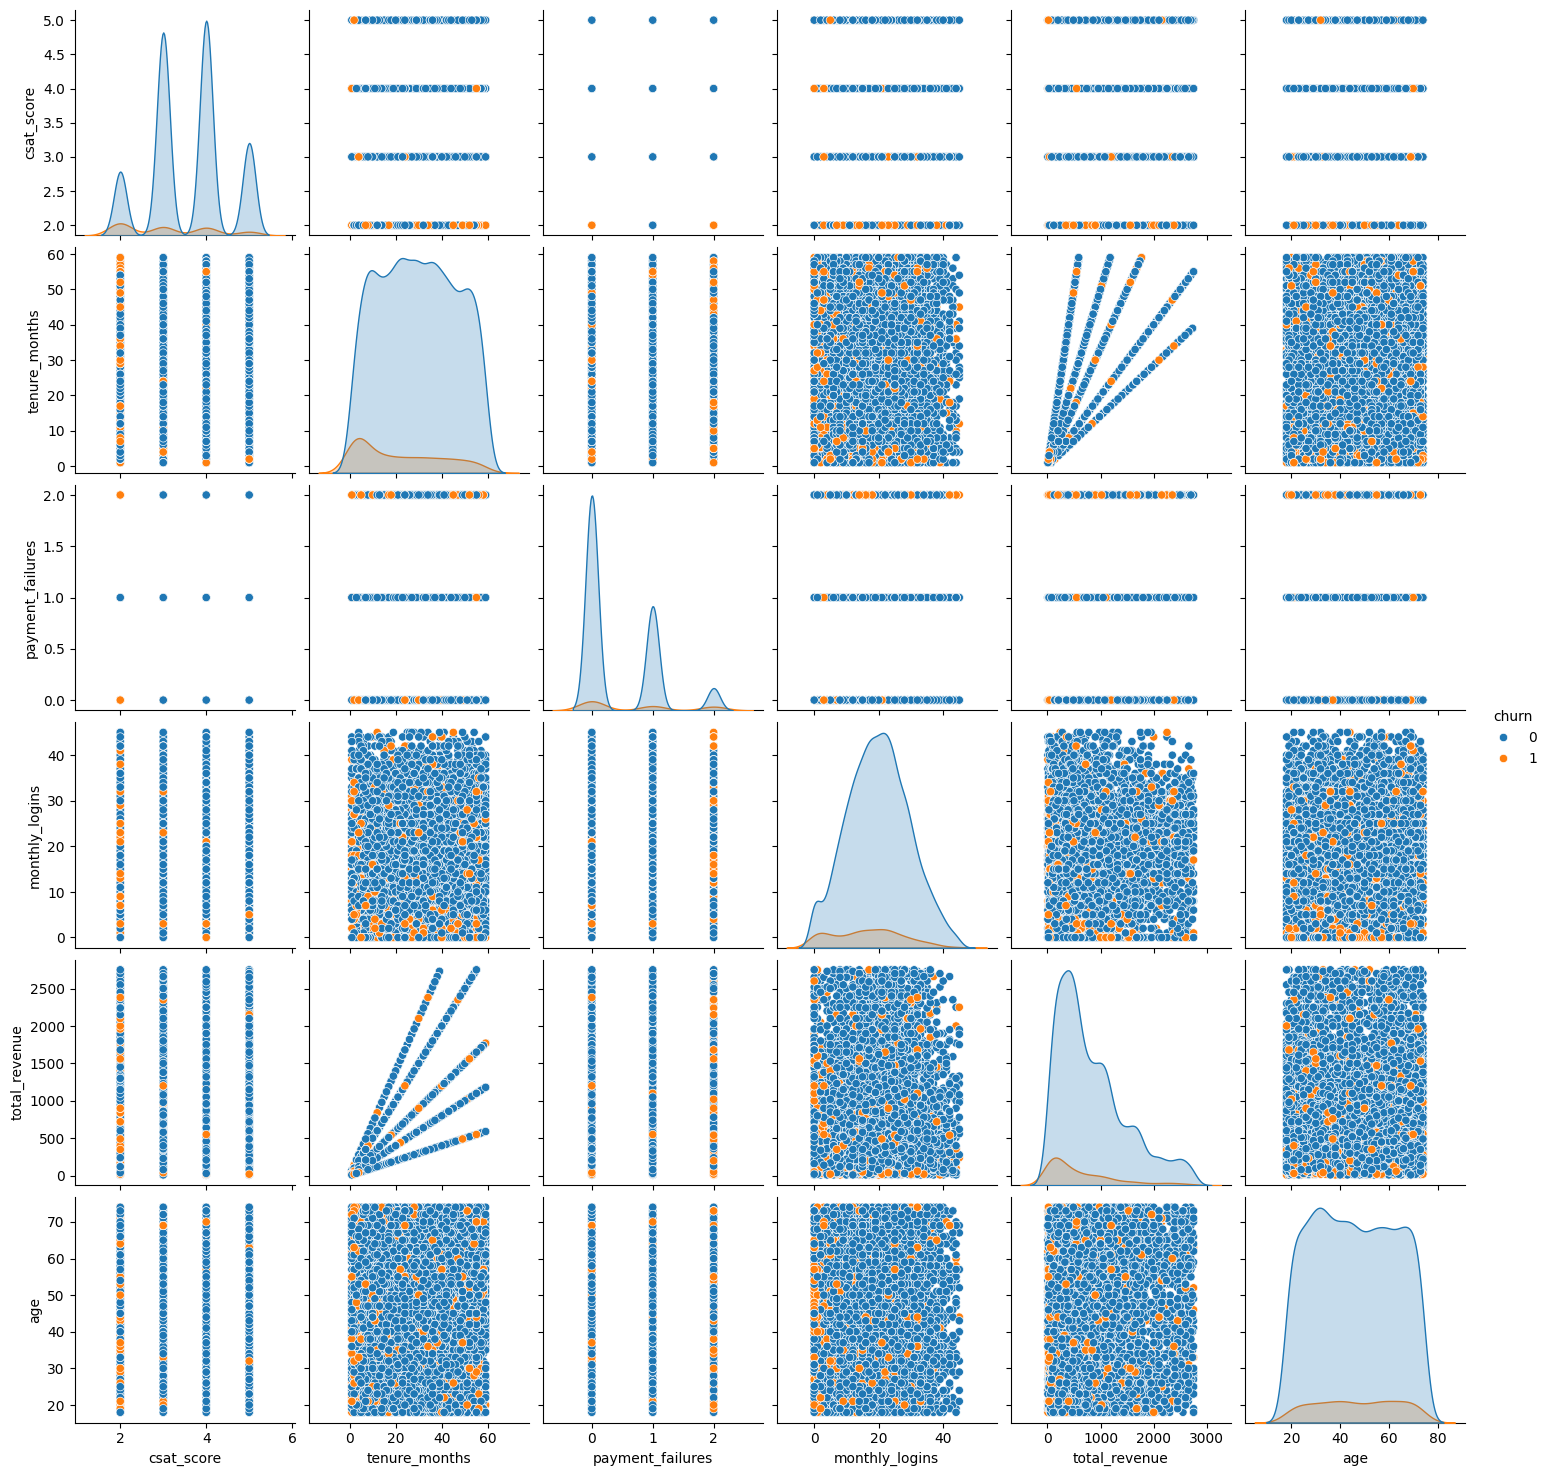

In [87]:
# Pair plot the top 6 numeric features with 'churn' in hue
sns.pairplot(df[top_features], hue='churn', diag_kind="kde")
plt.show()

In [88]:
# Verify info prior to modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7937 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  7937 non-null   object 
 1   age                     7937 non-null   int64  
 2   country                 7937 non-null   object 
 3   city                    7937 non-null   object 
 4   customer_segment        7937 non-null   object 
 5   tenure_months           7937 non-null   int64  
 6   signup_channel          7937 non-null   object 
 7   contract_type           7937 non-null   object 
 8   monthly_logins          7937 non-null   int64  
 9   weekly_active_days      7937 non-null   int64  
 10  avg_session_time        7937 non-null   float64
 11  features_used           7937 non-null   int64  
 12  usage_growth_rate       7937 non-null   float64
 13  last_login_days_ago     7937 non-null   int64  
 14  monthly_fee             7937 non-null   int64

### MODELING  
  
The following classifiers are used to build predictive models:     
**Logistic Regression**     
**Decision Tree Classifier**     
**K-Nearest Neighbors**       
**Support Vector Classifer**   
For each classifier, several models are constructed and their respective performances are compared to each other. In addition to accuracy, precision, recall, F2 score, and AUC, the best model is chosen based on business goals that consider the relative cost of missing a churner (false negatives - predicted not to churn but churned, loss of lifetime value), cost of false alarms (false positives - predicted to churn but stayed, cost of retention offer) and true positives (predicted to stay and actually stayed, saved lifetime value less the cost of retention offer).     
In this particular case of customer churn, missing churners (recall) is more expensive than false alarms (precision).  Recall is, therefore, optimized at the expense of precision and accuracy.     
**Feature Importance**     
The features and their proportional importances are also identified particularly those whose increase or decrease correspondingly increase or decrease the odds of customer churn.   


In [89]:
# Define X and y
X = df.drop(['churn'], axis=1)
y = df['churn']

In [90]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

**A Baseline Model**     
Before the first model is built, a baseline is established.  The classifiers to be built should beat the baseline performance **AUC**.

In [91]:
# Build a baseline model
baseline = DummyClassifier(strategy='stratified')
baseline.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [92]:
# Evaluate baseline model using 'roc_auc'
y_proba = baseline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f'The baseline Receiver Operating Curve AUC is {roc_auc:.2f}')

The baseline Receiver Operating Curve AUC is 0.50


In [93]:
# Define numeric features
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['age',
 'tenure_months',
 'monthly_logins',
 'weekly_active_days',
 'avg_session_time',
 'features_used',
 'usage_growth_rate',
 'last_login_days_ago',
 'monthly_fee',
 'total_revenue',
 'payment_failures',
 'support_tickets',
 'avg_resolution_time',
 'csat_score',
 'escalations',
 'email_open_rate',
 'marketing_click_rate',
 'nps_score',
 'referral_count',
 'churn']

In [94]:
# Define numeric_cols
numeric_cols = ['age','tenure_months','monthly_logins','weekly_active_days','avg_session_time','features_used',
                'usage_growth_rate','last_login_days_ago','monthly_fee','total_revenue','payment_failures',
                'support_tickets','avg_resolution_time','csat_score','escalations','email_open_rate',
                'marketing_click_rate','nps_score','referral_count']

print(f'There are {len(numeric_cols)} numeric columns.')

There are 19 numeric columns.


**Encode the categorical features**

In [95]:
# Verify categorical features for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['gender',
 'country',
 'city',
 'customer_segment',
 'signup_channel',
 'contract_type',
 'payment_method',
 'discount_applied',
 'price_increase_last_3m',
 'complaint_type',
 'survey_response']

In [96]:
# Define the ordinal and nominal features
ordinal_cols = ['contract_type','survey_response']
nominal_cols = ['gender', 'country', 'city', 'customer_segment', 'signup_channel', 'payment_method',
                'discount_applied', 'price_increase_last_3m', 'complaint_type']

print(f'There are {len(ordinal_cols)} ordinal columns and {len(nominal_cols)} nominal columns.')

There are 2 ordinal columns and 9 nominal columns.


In [97]:
# Verify 'contract_type' and 'survey_response'

print(df['contract_type'].value_counts(), '\n')
print(df['survey_response'].value_counts())

contract_type
Monthly      3941
Quarterly    2421
Yearly       1575
Name: count, dtype: int64 

survey_response
Satisfied      3940
Neutral        2385
Unsatisfied    1612
Name: count, dtype: int64


In [98]:
# Prepare the ordinal encoder
ordinal_encoder = OrdinalEncoder(
    categories=[
      ['Monthly','Quarterly','Yearly'],         # contract_type
      ['Unsatisfied','Neutral','Satisfied']     # survey_response
    ]
)

In [99]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_cols),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['Monthly',
                                                             'Quarterly',
                                                             'Yearly'],
                                                            ['Unsatisfied',
                                                             'Neutral',
                                                             'Satisfied']]),
                                 ['contract_type', 'survey_response']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'country', 'city',
                                  'customer_segment', 'signup_channel',
                                  'payment_method', 'discount_applied',
                                  'price_increase_last_3m',
                                  'complaint_type'])])

**Build a simple Logistic Regression model**    
A simple Logistic Regression model is built and called **Model L1**.

In [100]:
# Build a pipeline
lgr_pipe_simple = Pipeline([
    ('transformer', transformer),
    ('lgr', LogisticRegression(random_state=42))
])
lgr_pipe_simple.fit(X_train, y_train)
lgr_pipe_simple

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('lgr', LogisticRegression(random_state=42))])

In [101]:
# Accuracy of model on train and test data
lgr_pipe_simple_acc_train = lgr_pipe_simple.score(X_train, y_train)
lgr_pipe_simple_acc_test = lgr_pipe_simple.score(X_test, y_test)

print(f'The train accuracy of the model is {lgr_pipe_simple_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {lgr_pipe_simple_acc_test*100:.2f}%')

The train accuracy of the model is 90.74%
The test accuracy of the model is 90.81%


**Compare model accuracy with baseline accuracy**     
The model test accuracy is slightly better than the baseline (90.81% model accuracy vs 90.62% baseline accuracy).    


In [102]:
# Baseline accuracy
baseline_acc = y_test.value_counts(normalize=True).max()

print(f'The baseline accuracy for predicting majority class is {baseline_acc*100:.2f}%')

The baseline accuracy for predicting majority class is 90.62%


In [103]:
# Define Model L1 threshold (default)
threshold_L1 = 0.50

**Classification Report L1**          
This model prediction for non-churn (0) is 91% correct (precision). When the model predicts churn (1), however, it is only right 80% of the time.  The model is also able to catch only 3% of churners (recall).   

In [104]:
# Generate classification report L1
y_pred_L1 = lgr_pipe_simple.predict(X_test)

print(classification_report(y_test, y_pred_L1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1439
           1       0.80      0.03      0.05       149

    accuracy                           0.91      1588
   macro avg       0.85      0.51      0.50      1588
weighted avg       0.90      0.91      0.87      1588



**Confusion Matrix L1**     
1,438 customers that do not churn are correctly predicted not to churn (true negatives) and 4 customers that churn are correctly predicted to churn (true positives) out of 1,588 samples (accuracy = 91%).     
1 customer that does not churn is incorrectly predicted to churn (false positive). Precision is 80%.
145 customers who churn are incorrectly predicted not to churn (false negatives). Recall is only 3%.     
The model finds 3% of actual churners (4 out of 149 churners) - 97% of churners are missed (145 out of 149 churners).     


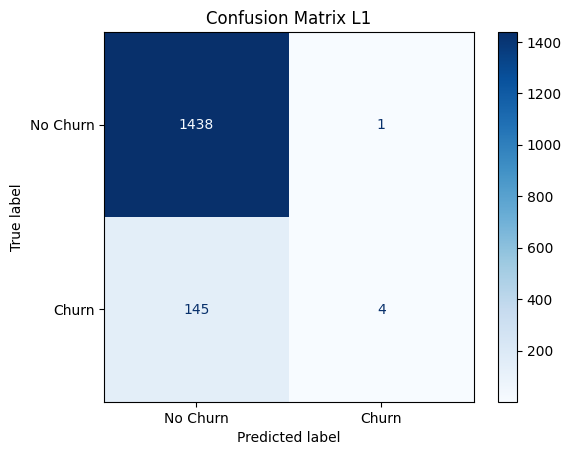

In [105]:
# Display confusion matrix L1
conf_matrix_L1 = confusion_matrix(y_test, y_pred_L1)
disp_L1 = ConfusionMatrixDisplay(conf_matrix_L1, display_labels=['No Churn','Churn'])
disp_L1.plot(cmap='Blues')
plt.title('Confusion Matrix L1')
plt.show()

In [106]:
# Values for false positive (fp_L1), false negative (fn_L1), true positive (tp_L1) and true negative (tn_L1)
fp_L1 = conf_matrix_L1[0][1]
fn_L1 = conf_matrix_L1[1][0]
tp_L1 = conf_matrix_L1[1][1]
tn_L1 = conf_matrix_L1[0][0]

print(f' fp_L1: {fp_L1} \n fn_L1: {fn_L1} \n tp_L1: {tp_L1} \n tn_L1: {tn_L1}')

 fp_L1: 1 
 fn_L1: 145 
 tp_L1: 4 
 tn_L1: 1438


In [107]:
# Calculations for accuracy, precision, recall
accuracy_L1 = (tp_L1 + tn_L1)/len(y_test)
precision_L1 = tp_L1/(tp_L1 + fp_L1)
recall_L1 = tp_L1/(tp_L1 + fn_L1)

print(f'Accuracy: {accuracy_L1:.2f}')
print(f'Precision: {precision_L1:.2f}')
print(f'Recall: {recall_L1:.2f}')
print(f'-'*28)

Accuracy: 0.91
Precision: 0.80
Recall: 0.03
----------------------------


**$F$-score**   
The formula for the $F$-score is $F_{\beta} = (1 + \beta^2) \frac{PR}{\beta^2 P + R}$ where $P$ is precision and $R$ is recall.    
It is a common metric used to find the best balance between catching as many positive cases as possible (Recall) and being accurate when you do (Precision).    

With β=2, it is considered that Recall is twice as important as Precision and is used for a customer churn problem.

In [108]:
# Calculate F2 score for Model L1
beta = 2
F2_score_L1 = (1 + beta**2) * (precision_L1 * recall_L1) / (beta**2 * precision_L1 + recall_L1)

print(f'The F2 score for Model L1 is {F2_score_L1:.4f}')

The F2 score for Model L1 is 0.0333


**Profit/Loss analysis**     
The profit/loss analysis compares the relative performance of the models financially. For demonstration purposes, the following values are used:     
**L** = value of retaining a churner (lifetime value) is \$500      
**C** = cost of retention action is \$40     
True positives (**TP**) are correctly identified churners (retention action is spent but the value is saved).   
False positives (**FP**) stay but predicted to leave (retention action is spent but no value is saved).    
False negatives (**FN)** are predicted not to leave but leave (no retention action spent but value is lost).    
True negatives (**TN**) are correctly predicted not to leave (no retention action spent and no value is lost).

In [109]:
# Profit/loss analysis for Model L1
L = 500
C = 40
Profit_Loss_L1 = tp_L1*(L - C) - fp_L1*C - fn_L1*L

print(f'The profit or loss is ${Profit_Loss_L1}')

The profit or loss is $-70700


In [110]:
# Verify class imbalance
val_count_churn = df['churn'].value_counts(normalize=True)

print(val_count_churn)

churn
0    0.906262
1    0.093738
Name: proportion, dtype: float64


**Improve the Logistic Regression model**     
The next Logistic Regression model uses the parameter class_weight='balanced' and then the model is optimized. The model is called **Model L2**.

In [111]:
# Build a pipeline
lgr_pipe1 = Pipeline([
    ('transformer', transformer),
    ('lgr', LogisticRegression(class_weight='balanced', random_state=42))
])
lgr_pipe1.fit(X_train, y_train)
lgr_pipe1

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('lgr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [112]:
# Define parameter grid in preparation for optimizing the model
param_grid_L1 = {
    'lgr__C': np.logspace(-4, 4, 20),
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'lgr__max_iter': [100, 1000, 2500, 5000]
}

In [113]:
# Run HalvingRandomSearchCV to find the optimum mix of parameters
grid_search_L1 = HalvingRandomSearchCV(lgr_pipe1, param_grid_L1, cv=5, scoring='f1', n_jobs=-1)
grid_search_L1.fit(X_train, y_train)

print(f'Best parameters: {grid_search_L1.best_params_}')
print(f'Best score: {grid_search_L1.best_score_:.4f}')

Best parameters: {'lgr__solver': 'liblinear', 'lgr__penalty': 'l2', 'lgr__max_iter': 100, 'lgr__C': np.float64(0.004832930238571752)}
Best score: 0.2823


In [114]:
# Access the optimized pipeline model
grid_lgr_L1 = grid_search_L1.best_estimator_
grid_lgr_L1

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('lgr',
                 LogisticRegression(C=np.float64(0.004832930238571752),
                                    class_weight='balanced', random_state=42,
                                    solver='liblinear'))])

**Accuracy goes down but recall goes up**   
In order to improve recall, accuracy and precision are sacrificed because it is more expensive to miss churners.

In [115]:
# Accuracy of lgr_pipe1 on test data
pipe_1_acc = grid_lgr_L1.score(X_test, y_test)

print(f'The accuracy of the grid_lgr_L1 model on test data is {pipe_1_acc*100:.2f}%')

The accuracy of the grid_lgr_L1 model on test data is 65.62%


In [116]:
# Define Model L2 threshold
threshold_L2 = 0.50

**Classification Report L2**         
When the model predicts churn (1), it is now only right 17% of the time compared to 80% in the previous model.
The correct identification of non-churn customers also drops to 64% from 100%.  However, the model is now catching 71% of actual churners.      
While recall improves, precision goes down.

In [117]:
# Generate classification report L2
y_pred_L2 = grid_lgr_L1.predict(X_test)

print(classification_report(y_test, y_pred_L2))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1439
           1       0.17      0.68      0.27       149

    accuracy                           0.66      1588
   macro avg       0.56      0.67      0.52      1588
weighted avg       0.88      0.66      0.73      1588



915 customers that do not churn are correctly predicted not to churn (true negatives) and 106 customers that churn are correctly predicted to churn (true positives) out of 1,588 samples (accuracy = 64% down from 91%).     
524 customers that do not churn are incorrectly predicted to churn (false positives). Precision is down to 17% from 80%.
43 customers who churn are incorrectly predicted not to churn (false negatives). Recall is up to 68% from 3%.     
The model now finds 71% of actual churners (106 out of 149 churners).     

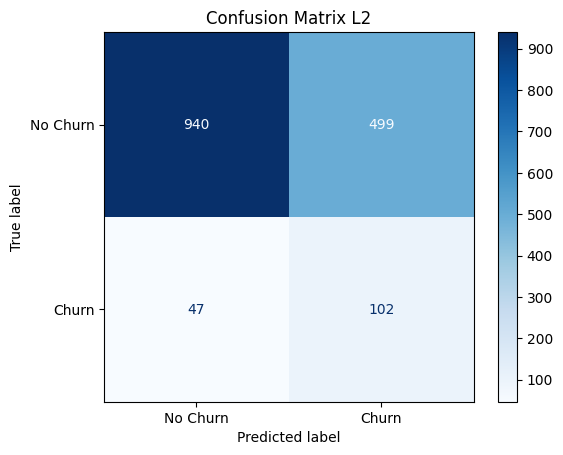

In [118]:
# Display confusion matrix L2
conf_matrix_L2 = confusion_matrix(y_test, y_pred_L2)
disp_L2 = ConfusionMatrixDisplay(conf_matrix_L2, display_labels=['No Churn','Churn'])
disp_L2.plot(cmap='Blues')
plt.title('Confusion Matrix L2')
plt.show()

In [119]:
# Values for false positive (fp_L2), false negative (fn_L2), true positive (tp_L2) and true negative (tn_L2)
fp_L2 = conf_matrix_L2[0][1]
fn_L2 = conf_matrix_L2[1][0]
tp_L2 = conf_matrix_L2[1][1]
tn_L2 = conf_matrix_L2[0][0]

print(f' fp_L2: {fp_L2} \n fn_L2: {fn_L2} \n tp_L2: {tp_L2} \n tn_L2: {tn_L2}')

 fp_L2: 499 
 fn_L2: 47 
 tp_L2: 102 
 tn_L2: 940


In [120]:
# Calculations for accuracy, precision, recall
accuracy_L2 = (tp_L2 + tn_L2)/len(y_test)
precision_L2 = tp_L2/(tp_L2 + fp_L2)
recall_L2 = tp_L2/(tp_L2 + fn_L2)

print(f'Accuracy: {accuracy_L2:.2f}')
print(f'Precision: {precision_L2:.2f}')
print(f'Recall: {recall_L2:.2f}')

Accuracy: 0.66
Precision: 0.17
Recall: 0.68


In [121]:
# Calculate F2 score for Model L2
beta = 2
F2_score_L2 = (1 + beta**2) * (precision_L2 * recall_L2) / (beta**2 * precision_L2 + recall_L2)

print(f'The F2 score for Model L2 is {F2_score_L2:.4f}')

The F2 score for Model L2 is 0.4261


In [122]:
# Profit/loss analysis for Model L2
Profit_Loss_L2 = tp_L2*(L - C) - fp_L2*C - fn_L2*L

print(f'The profit or loss is ${Profit_Loss_L2}')

The profit or loss is $3460


**ROC Curve**     
The ROC Curve plots the True Positive Rate vs False Positive Rate for every possible threshold.     
The higher the AUC (Area Under the Curve) and the more the curve 'bows' toward the top left corner, the better the model is.     

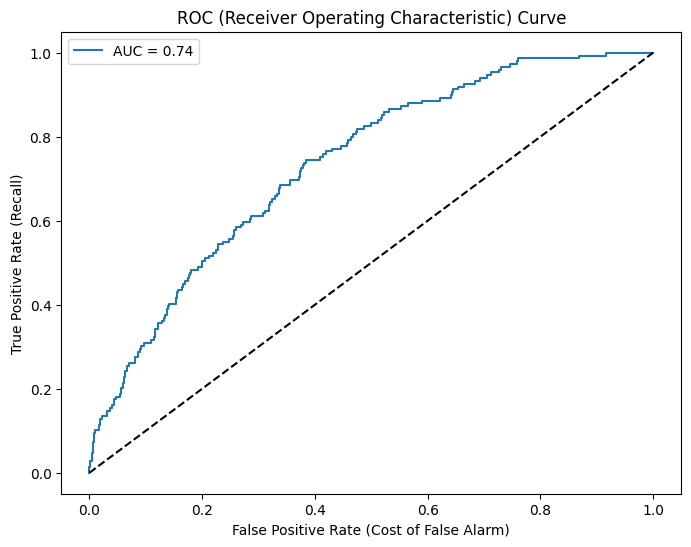

In [123]:
# Plot the ROC Curve
y_probs1 = grid_lgr_L1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs1)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs1):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

**Optimal Threshold**    
The optimal threshold is a careful balance between precision and recall. What threshold to use is a business decision. High precision means money is not wasted on saving customers who are not actually going to leave. High recall means that customers who are about to quit are not missed. However, raising recall lowers precision. Lowering the threshold increases recall but decreases precision.     
_Youden's J Statistic_     
This method to find the optimal threshold from the ROC curve maximizes the vertical distance from the diagonal line or line of random guessing. However, this assumes that the cost of false positive (wrongly flagging a loyal customer might be a churner) is the same as a false negative (missing a customer who is about to churn). For example, if losing a customer costs \$500 and a discount coupon costs only \$20, the threshold should be lowered (move higher on the ROC curve) and move away from the 'Youden point' or optimal threshold.

In [124]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold1 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold1 :.4f}')

The optimal threshold is 0.4819


**Precision-Recall Curve**   
The Precision-Recall Curve shows how precision suffers with the increase in recall. The Average Precision (AP = 0.24) showed that while the model has some predictive power, it struggles with a high number of false positives when trying to catch most churners.

In [125]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs1)
avg_precision = average_precision_score(y_test, y_probs1)

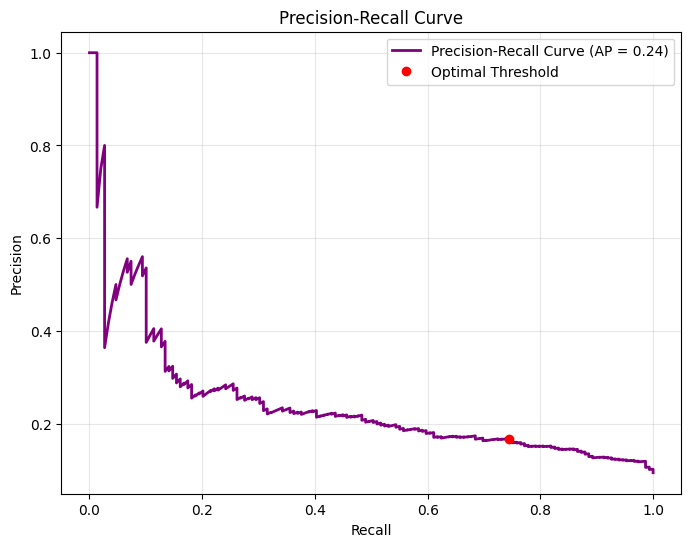

In [126]:
# Plot the curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold1))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimal Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

**Evaluate precision and recall at different thresholds**     
As shown below, recall improves to 93% when threshold is lowered to 0.45. The next model (**Model L4**) verifies this.

In [127]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0.05, 0.70, 0.05)

for threshold in thresholds:
    preds = (y_probs1 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.05 | Precision=0.09 | Recall=1.00
Threshold=0.10 | Precision=0.09 | Recall=1.00
Threshold=0.15 | Precision=0.10 | Recall=1.00
Threshold=0.20 | Precision=0.10 | Recall=0.99
Threshold=0.25 | Precision=0.11 | Recall=0.99
Threshold=0.30 | Precision=0.12 | Recall=0.97
Threshold=0.35 | Precision=0.13 | Recall=0.89
Threshold=0.40 | Precision=0.14 | Recall=0.86
Threshold=0.45 | Precision=0.15 | Recall=0.77
Threshold=0.50 | Precision=0.17 | Recall=0.68
Threshold=0.55 | Precision=0.19 | Recall=0.58
Threshold=0.60 | Precision=0.21 | Recall=0.48
Threshold=0.65 | Precision=0.22 | Recall=0.37


**Threshold that maximizes profit**     
Given the lifetime value of the subscription (L) and the cost of acquiring the subscription (C), the threshold that maximizes profit is determined.

In [128]:
# Determine the threshold that maximizes profit given L(lifetime value) and C(cost of subscription)
profits = []

for t in thresholds:
    y_pred = (y_probs1 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.3


In [129]:
# Define Model L3 threshold
threshold_L3 = best_threshold

In [130]:
# Use best_threshold to improve recall
y_pred_L3 = (y_probs1 >= threshold_L3).astype(int)

In [131]:
# Generate classification report L3

print(classification_report(y_test, y_pred_L3))

              precision    recall  f1-score   support

           0       0.99      0.26      0.42      1439
           1       0.12      0.97      0.21       149

    accuracy                           0.33      1588
   macro avg       0.55      0.62      0.32      1588
weighted avg       0.91      0.33      0.40      1588



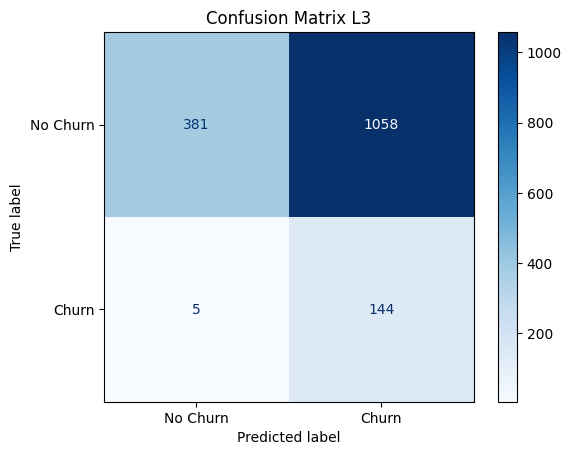

In [132]:
# Display confusion matrix L3
conf_matrix_L3 = confusion_matrix(y_test, y_pred_L3)
disp_L3 = ConfusionMatrixDisplay(conf_matrix_L3, display_labels=['No Churn','Churn'])
disp_L3.plot(cmap='Blues')
plt.title('Confusion Matrix L3')
plt.show()

In [133]:
# Values for false positive (fp_L3), false negative (fn_L3), true positive (tp_L3) and true negative (tn_L3)
fp_L3 = conf_matrix_L3[0][1]
fn_L3 = conf_matrix_L3[1][0]
tp_L3 = conf_matrix_L3[1][1]
tn_L3 = conf_matrix_L3[0][0]

print(f' fp_L3: {fp_L3} \n fn_L3: {fn_L3} \n tp_L3: {tp_L3} \n tn_L3: {tn_L3}')

 fp_L3: 1058 
 fn_L3: 5 
 tp_L3: 144 
 tn_L3: 381


In [134]:
# Calculations for accuracy, precision, recall
accuracy_L3 = (tp_L3 + tn_L3)/len(y_test)
precision_L3 = tp_L3/(tp_L3 + fp_L3)
recall_L3 = tp_L3/(tp_L3 + fn_L3)

print(f'Accuracy_L3: {accuracy_L3:.2f}')
print(f'Precision_L3: {precision_L3:.2f}')
print(f'Recall_L3: {recall_L3:.2f}')
print(f'-'*18)

Accuracy_L3: 0.33
Precision_L3: 0.12
Recall_L3: 0.97
------------------


In [135]:
# Calculate F2 score for Model L3
beta = 2
F2_score_L3 = (1 + beta**2) * (precision_L3 * recall_L3) / (beta**2 * precision_L3 + recall_L3)

print(f'The F2 score for Model L3 is {F2_score_L3:.4f}')

The F2 score for Model L3 is 0.4004


In [136]:
# Profit/loss analysis for Model L3
Profit_Loss_L3 = tp_L3*(L - C) - fp_L3*C - fn_L3*L

print(f'The profit or loss is ${Profit_Loss_L3}')

The profit or loss is $21420


**Model Summary**     
A dataframe is plotted to summarize the accuracy, precision, recall, F2 score and profit/loss for the different Logistic Regression models.     

In terms of profit/loss, **Model L10** and **Model L6** are almost tied with \$41,640 and (\$41,380), respectively.

**Model L10** and **Model L6** are the better models because of the following respective metrics: accuracy (33%, 38%), precision (12%, 12%) and recall (94%, 93%) that maximizes churn identification.

**Model L5** is the conservative choice because accuracy (61%) and precision (16%) are higher, although recall (75%) is lower. Also, an optimum threshold was used in **Model L5**.

If the retention campaign is very cheap, **Model L10** or **Model L6** is preferred. Even though the F2 scores are slightly lower, catching 93-95% of churners (Recall) might be worth the extra False Positives.

The choice would need to consider the actual relative cost of missing a churner (false negatives - predicted not to churn but churned) and false alarms (false positives - predicted to churn but stayed) in order to determine the optimum mix of precision and recall.    


In [137]:
# Build a dataframe summarizing the model properties
lgr_model_df = pd.DataFrame({
    'Model': ['Model L1','Model L2','Model L3'],
    'Balanced': ['No','class_weight','class_weight'],
    'Threshold': [threshold_L1, threshold_L2, threshold_L3],
    'Accuracy': [accuracy_L1, accuracy_L2, accuracy_L3],
    'Precision': [precision_L1, precision_L2, precision_L3],
    'Recall': [recall_L1, recall_L2, recall_L3],
    'F2 Score': [F2_score_L1, F2_score_L2, F2_score_L3],
    'Profit/Loss': [Profit_Loss_L1, Profit_Loss_L2, Profit_Loss_L3],
})
lgr_model_df

Model      Balanced  Threshold  Accuracy  Precision    Recall  F2 Score  \
0  Model L1            No        0.5  0.908060   0.800000  0.026846  0.033278   
1  Model L2  class_weight        0.5  0.656171   0.169717  0.684564  0.426065   
2  Model L3  class_weight        0.3  0.330605   0.119800  0.966443  0.400445   

   Profit/Loss  
0       -70700  
1         3460  
2        21420

In [138]:
# Provide an interactive Plotly plot
fig = go.Figure()

# Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score']

for metric in metrics:
  fig.add_trace(
        go.Scatter(
          x=lgr_model_df['Model'],
          y=lgr_model_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=lgr_model_df['Model'],
          y=lgr_model_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()


**Analysis of feature importance from the Logistic Regression model**

In [139]:
# Extract feature names
feature_names = lgr_pipe1.named_steps['transformer'].get_feature_names_out()

print(f'The feature names are: \n \n {feature_names} \n')
print(f'There are {len(feature_names)} feature names.')

The feature names are: 
 
 ['ordinalencoder__contract_type' 'ordinalencoder__survey_response'
 'onehotencoder__gender_Male' 'onehotencoder__country_Bangladesh'
 'onehotencoder__country_Canada' 'onehotencoder__country_Germany'
 'onehotencoder__country_India' 'onehotencoder__country_UK'
 'onehotencoder__country_USA' 'onehotencoder__city_Delhi'
 'onehotencoder__city_Dhaka' 'onehotencoder__city_London'
 'onehotencoder__city_New York' 'onehotencoder__city_Sydney'
 'onehotencoder__city_Toronto'
 'onehotencoder__customer_segment_Individual'
 'onehotencoder__customer_segment_SME'
 'onehotencoder__signup_channel_Referral'
 'onehotencoder__signup_channel_Web' 'onehotencoder__payment_method_Card'
 'onehotencoder__payment_method_PayPal'
 'onehotencoder__discount_applied_Yes'
 'onehotencoder__price_increase_last_3m_Yes'
 'onehotencoder__complaint_type_Service'
 'onehotencoder__complaint_type_Technical' 'remainder__age'
 'remainder__tenure_months' 'remainder__monthly_logins'
 'remainder__weekly_acti

In [140]:
# Clean up the feature names
clean_names = [i.split('__')[-1] for i in feature_names]

print(f'The clean feature names are: \n \n {clean_names}')

The clean feature names are: 
 
 ['contract_type', 'survey_response', 'gender_Male', 'country_Bangladesh', 'country_Canada', 'country_Germany', 'country_India', 'country_UK', 'country_USA', 'city_Delhi', 'city_Dhaka', 'city_London', 'city_New York', 'city_Sydney', 'city_Toronto', 'customer_segment_Individual', 'customer_segment_SME', 'signup_channel_Referral', 'signup_channel_Web', 'payment_method_Card', 'payment_method_PayPal', 'discount_applied_Yes', 'price_increase_last_3m_Yes', 'complaint_type_Service', 'complaint_type_Technical', 'age', 'tenure_months', 'monthly_logins', 'weekly_active_days', 'avg_session_time', 'features_used', 'usage_growth_rate', 'last_login_days_ago', 'monthly_fee', 'total_revenue', 'payment_failures', 'support_tickets', 'avg_resolution_time', 'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate', 'nps_score', 'referral_count']


In [141]:
# Extract coefficients
coefficients = lgr_pipe1.named_steps['lgr'].coef_[0]

print(f'The coefficients are: \n \n {coefficients} \n')
print(f'There are {len(coefficients)} coefficients.')

The coefficients are: 
 
 [-7.17190880e-02 -8.21092263e-02  5.88360361e-02  7.16949092e-02
  5.64678887e-02  2.66293116e-01 -2.81012605e-02  2.02234591e-01
  8.95324912e-02  1.27944110e-02 -9.13109061e-03 -1.16242456e-01
  4.67997087e-03  1.21021958e-02  1.72707512e-01  9.81565677e-02
  1.43472303e-01  9.62142877e-02 -1.08078393e-01  1.02013951e-01
 -6.74785022e-02 -2.78515707e-02 -1.19821361e-01 -1.12082121e-01
  6.24927683e-03  9.84926659e-02 -5.06390413e-01 -4.40514073e-01
  2.70510120e-02 -1.38700588e-02 -5.03267591e-04 -4.36868244e-02
 -2.46147690e-02 -6.60813076e-02 -4.10003332e-02  3.87607737e-01
  6.83245915e-03 -3.37207431e-02 -5.47109691e-01  5.18605283e-02
  5.68307332e-02  1.05758316e-02  9.94179635e-03 -2.22468448e-02] 

There are 44 coefficients.


In [142]:
# Construct a dataframe of coefficients
weight_coef_df = pd.DataFrame({'feature': clean_names, 'coefs': coefficients})
weight_coef_df = weight_coef_df.sort_values(by='coefs', ascending=False)

print(weight_coef_df.head(10))
print(weight_coef_df.tail(10))

                        feature     coefs
35             payment_failures  0.387608
5               country_Germany  0.266293
7                    country_UK  0.202235
14                 city_Toronto  0.172708
16         customer_segment_SME  0.143472
19          payment_method_Card  0.102014
25                          age  0.098493
15  customer_segment_Individual  0.098157
17      signup_channel_Referral  0.096214
8                   country_USA  0.089532
                       feature     coefs
20       payment_method_PayPal -0.067479
0                contract_type -0.071719
1              survey_response -0.082109
18          signup_channel_Web -0.108078
23      complaint_type_Service -0.112082
11                 city_London -0.116242
22  price_increase_last_3m_Yes -0.119821
27              monthly_logins -0.440514
26               tenure_months -0.506390
38                  csat_score -0.547110


In [143]:
# Extract the list of selected features and coefficients for plotting
feature1 = weight_coef_df.iloc[:9,0]
feature2 = weight_coef_df.iloc[-8:,0]
features = pd.concat([feature1, feature2])
features = pd.DataFrame(features)
features_list = features.values.tolist()
features_list = [item for sublist in features_list for item in sublist]

coef1 = weight_coef_df.iloc[:9,1]
coef2 = weight_coef_df.iloc[-8:,1]
coefs = pd.concat([coef1, coef2])
coefs = pd.DataFrame(coefs)
coefs_list = coefs.values.tolist()
coefs_list = [item for sublist in coefs_list for item in sublist]

In [144]:
# Prepare to plot the important features and coefficients

plot_data_lgr = {
    'feature': features_list,
    'coefs': coefs_list
}

plot_lgr_df = pd.DataFrame(plot_data_lgr)
plot_lgr_df = plot_lgr_df.sort_values(by='coefs', ascending=True)

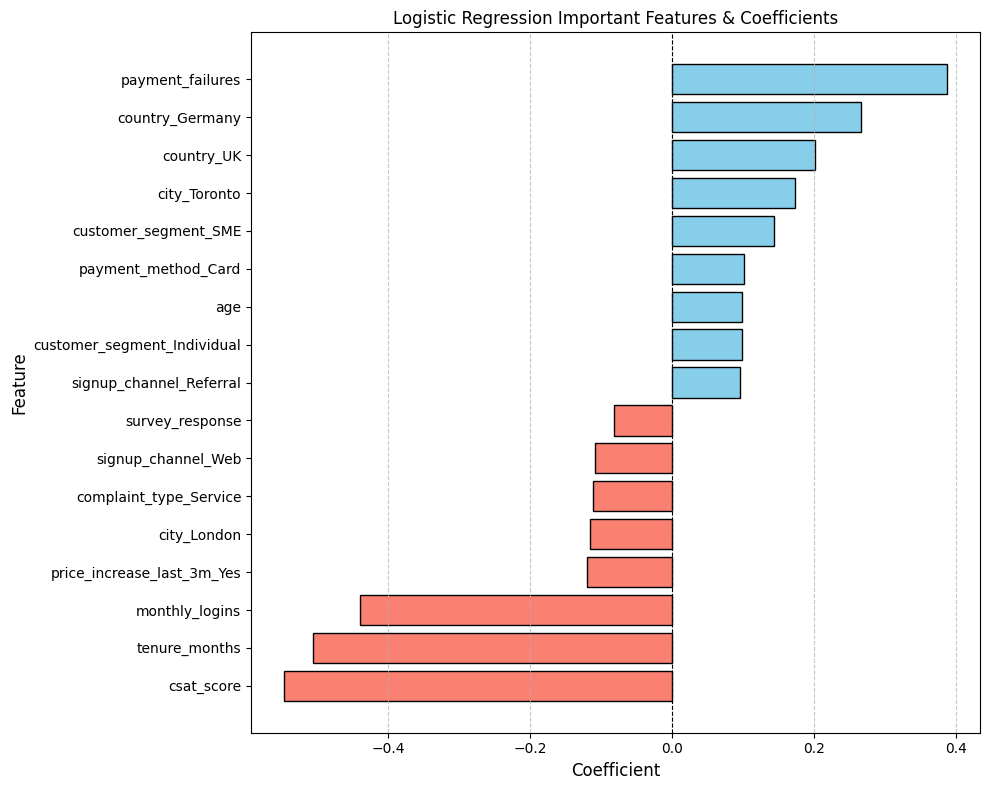

In [145]:
# Plot the feature and importance
plt.figure(figsize=(10, 8))
colors = ['salmon' if x < 0 else 'skyblue' for x in plot_lgr_df['coefs']]
plt.barh(plot_lgr_df['feature'], plot_lgr_df['coefs'], color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('Logistic Regression Important Features & Coefficients')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Churn Odds**    
**payment failures** is the number one predictor for churn. A customer with failed payments is significantly more likely to leave. A unit increase in payment failures raises odds of churn by **47%** assuming all other variables remain constant.    
Compared to the reference locations, customers in **Germany**, the **UK** and the **city of Toronto** are a high churn risk by **31%**, **22%**, and **19%**, respectively.      
As these values go up, the probability of churn increases.      
On the other hand, **csat score** is the number one retention factor. High customer satisfaction is the strongest signal that a customer will stay. A unit increase in customer satisfaction scores decreases odds of churn by **42%** assuming all other variables remain constant.    
**tenure months (-40%)** is another anchor - the longer a customer stays, the less likely it is to leave.      
**monthly logins (-36%)** - high product engagement is a major indicator of a healthy customer who will continue to stay.     
As these values go up, the probability of churn decreases.

In [146]:
# Calculate odds ratios and percentage change in odds
weight_coef_df['odds_ratio'] = np.exp(weight_coef_df['coefs'])
weight_coef_df['percent_change'] = (weight_coef_df['odds_ratio'] - 1) * 100

# Sort by coefficient
weight_coef_df = weight_coef_df.sort_values(by='coefs', ascending=False)
weight_coef_df.head(44)

feature     coefs  odds_ratio  percent_change
35             payment_failures  0.387608    1.473452       47.345169
5               country_Germany  0.266293    1.305118       30.511755
7                    country_UK  0.202235    1.224135       22.413515
14                 city_Toronto  0.172708    1.188518       18.851843
16         customer_segment_SME  0.143472    1.154275       15.427484
19          payment_method_Card  0.102014    1.107399       10.739892
25                          age  0.098493    1.103506       10.350631
15  customer_segment_Individual  0.098157    1.103135       10.313549
17      signup_channel_Referral  0.096214    1.100995       10.099497
8                   country_USA  0.089532    1.093663        9.366287
3            country_Bangladesh  0.071695    1.074328        7.432753
2                   gender_Male  0.058836    1.060601        6.060133
40              email_open_rate  0.056831    1.058477        5.847663
4                country_Canada  0.056468    1.058093        5.809264
39                  escalations  0.051861    1.053229        5.322884
28           weekly_active_days  0.027051    1.027420        2.742021
9                    city_Delhi  0.012794    1.012877        1.287661
13                  city_Sydney  0.012102    1.012176        1.217572
41         marketing_click_rate  0.010576    1.010632        1.063195
42                    nps_score  0.009942    1.009991        0.999138
36              support_tickets  0.006832    1.006856        0.685585
24     complaint_type_Technical  0.006249    1.006269        0.626884
12                city_New York  0.004680    1.004691        0.469094
30                features_used -0.000503    0.999497       -0.050314
10                   city_Dhaka -0.009131    0.990910       -0.908953
29             avg_session_time -0.013870    0.986226       -1.377431
43               referral_count -0.022247    0.977999       -2.200121
32          last_login_days_ago -0.024615    0.975686       -2.431430
21         discount_applied_Yes -0.027852    0.972533       -2.746729
6                 country_India -0.028101    0.972290       -2.771009
37          avg_resolution_time -0.033721    0.966841       -3.315854
34                total_revenue -0.041000    0.959829       -4.017119
31            usage_growth_rate -0.043687    0.957254       -4.274630
33                  monthly_fee -0.066081    0.936055       -6.394525
20        payment_method_PayPal -0.067479    0.934748       -6.525218
0                 contract_type -0.071719    0.930792       -6.920767
1               survey_response -0.082109    0.921171       -7.882866
18           signup_channel_Web -0.108078    0.897557      -10.244277
23       complaint_type_Service -0.112082    0.893971      -10.602916
11                  city_London -0.116242    0.890259      -10.974065
22   price_increase_last_3m_Yes -0.119821    0.887079      -11.292111
27               monthly_logins -0.440514    0.643705      -35.629458
26                tenure_months -0.506390    0.602667      -39.733296
38                   csat_score -0.547110    0.578620      -42.138021

**Build a simple Decision Tree Classifier model**    
A simple Decision Tree Classifier model is built and called **Model D1**.

In [147]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(
            categories=[
                ['Monthly','Quarterly','Yearly'],         # contract_type
                ['Unsatisfied','Neutral','Satisfied']     # survey_response
            ],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('nom', OneHotEncoder(
            drop=None,
            handle_unknown='ignore'
        ), nominal_cols),
    ],
    remainder='passthrough'
)

In [148]:
# Build a pipeline
dtree_pipe_simple = Pipeline([
    ('preprocessor', preprocessor),
    ('dtree', DecisionTreeClassifier(random_state=42))
])
dtree_pipe_simple.fit(X_train, y_train)
dtree_pipe_simple

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('dtree', DecisionTreeClassifier(random_state=42))])

**Overfit model**    
The simple Decision Tree Classifier model is overfit (100% train accuracy is an indication of overfitting). This is addressed by using the parameter class_weight='balanced' and by optimization which includes pruning the overfit tree.

In [149]:
# Define the Model D1 threshold (default)
threshold_D1 = 0.5

In [150]:
# Accuracy of model on train and test data
dtree_pipe_simple_acc_train = dtree_pipe_simple.score(X_train, y_train)
dtree_pipe_simple_acc_test = dtree_pipe_simple.score(X_test, y_test)

print(f'The train accuracy of the model is {dtree_pipe_simple_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {dtree_pipe_simple_acc_test*100:.2f}%')

The train accuracy of the model is 100.00%
The test accuracy of the model is 83.94%


In [151]:
# Build a pipeline
dtree_pipe1 = Pipeline([
    ('preprocessor', preprocessor),
    ('dtree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])
dtree_pipe1.fit(X_train, y_train)
dtree_pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [152]:
# Define the hyperparameter grid to be fed to GridSearchCV
param_grid_dtree = {
    'dtree__criterion': ['gini', 'entropy'],
    'dtree__max_depth': [5, 6, 7, None],
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__ccp_alpha': [0.0, 0.001, 0.002, 0.005, 0.01],
    'dtree__min_samples_leaf': [2, 5, 10]
}

In [153]:
# Run GridSearchCV
grid_dtree = GridSearchCV(estimator=dtree_pipe1,
                              param_grid=param_grid_dtree,
                              scoring='f1',
                              cv=5,
                              n_jobs=-1)

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord',
                                                                         OrdinalEncoder(categories=[['Monthly',
                                                                                                     'Quarterly',
                                                                                                     'Yearly'],
                                                                                                    ['Unsatisfied',
                                                                                                     'Neutral',
                                                                                                     'Satisfied']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['contract_type',
                                                                          'survey_response']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='i...
                                                                          'discount_applied',
                                                                          'price_increase_last_3m',
                                                                          'complaint_type'])])),
                                       ('dtree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'dtree__ccp_alpha': [0.0, 0.001, 0.002, 0.005, 0.01],
                         'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [5, 6, 7, None],
                         'dtree__min_samples_leaf': [2, 5, 10],
                         'dtree__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [154]:
# Verify the best parameters

print(f'Best parameters: {grid_dtree.best_params_}')

Best parameters: {'dtree__ccp_alpha': 0.002, 'dtree__criterion': 'gini', 'dtree__max_depth': 5, 'dtree__min_samples_leaf': 2, 'dtree__min_samples_split': 2}


In [155]:
# Access the optimized dtree_pipe1 pipeline model
dtree_pipe1_opt = grid_dtree.best_estimator_
dtree_pipe1_opt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('dtree',
                 DecisionTreeClassifier(ccp_alpha=0.002,
                                        class_weight='balanced', max_depth=5,
                                        min_samples_leaf=2, random_state=42))])

In [156]:
# Accuracy of dtree_pipe2_opt on train and test data
dtree_pipe1_opt_acc_train = dtree_pipe1_opt.score(X_train, y_train)
dtree_pipe1_opt_acc_test = dtree_pipe1_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {dtree_pipe1_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {dtree_pipe1_opt_acc_test*100:.2f}%')

The train accuracy of the model is 74.52%
The test accuracy of the model is 74.81%


In [157]:
# Confirm the depth
depth_D1 = dtree_pipe1_opt.named_steps['dtree'].get_depth()

print(f'The depth is {depth_D1}')

The depth is 4


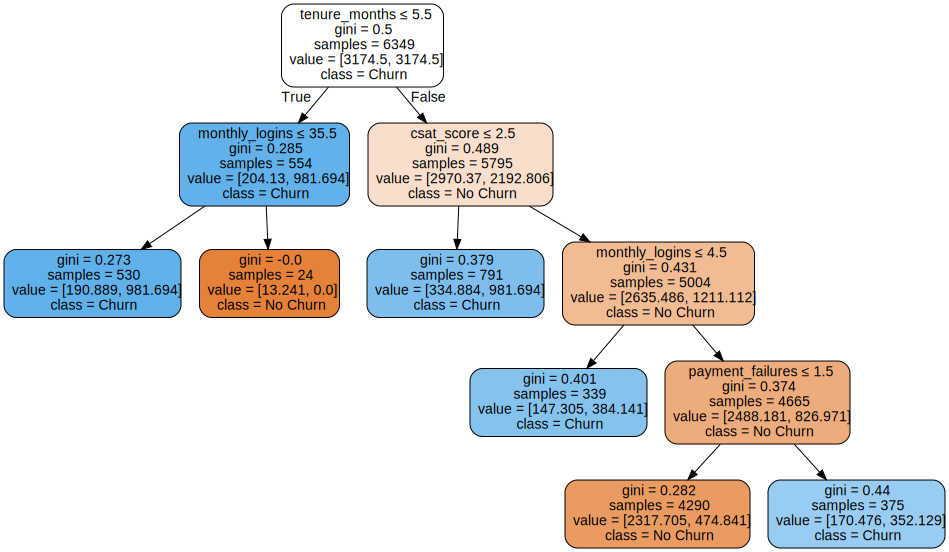

In [158]:
# Visualize the model
feature_names = dtree_pipe1_opt.named_steps['preprocessor'].get_feature_names_out()
clean_names = [i.split('__')[-1] for i in feature_names]

dot_data = export_graphviz(dtree_pipe1_opt.named_steps['dtree'],
                           out_file=None,
                           feature_names=clean_names,
                           class_names=['No Churn','Churn'],
                           filled=True,
                           rounded=True,
                           special_characters=True
)
graph=graphviz.Source(dot_data)
graph

In [159]:
# Generate classification report D1
y_pred_D1 = dtree_pipe1_opt.predict(X_test)

print(classification_report(y_test, y_pred_D1))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1439
           1       0.26      0.92      0.41       149

    accuracy                           0.75      1588
   macro avg       0.62      0.82      0.62      1588
weighted avg       0.92      0.75      0.80      1588



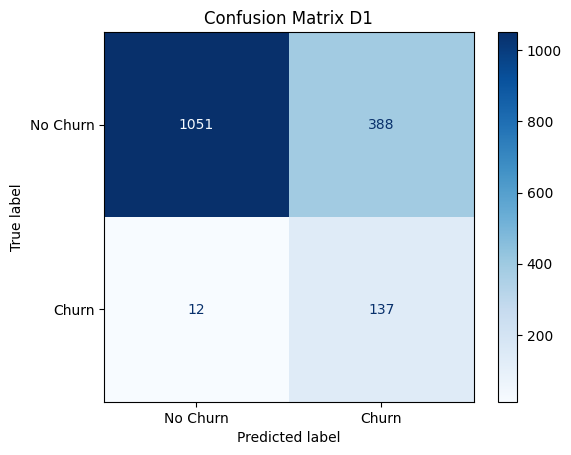

In [160]:
# Display confusion matrix D1
conf_matrix_D1 = confusion_matrix(y_test, y_pred_D1)
disp_D1 = ConfusionMatrixDisplay(conf_matrix_D1, display_labels=['No Churn','Churn'])
disp_D1.plot(cmap='Blues')
plt.title('Confusion Matrix D1')
plt.show()

In [161]:
# Values for false positive (fp_D1), false negative (fn_D1), true positive (tp_D1) and true negative (tn_D1)
fp_D1 = conf_matrix_D1[0][1]
fn_D1 = conf_matrix_D1[1][0]
tp_D1 = conf_matrix_D1[1][1]
tn_D1 = conf_matrix_D1[0][0]

print(f' fp_D1: {fp_D1} \n fn_D1: {fn_D1} \n tp_D1: {tp_D1} \n tn_D1: {tn_D1}')

 fp_D1: 388 
 fn_D1: 12 
 tp_D1: 137 
 tn_D1: 1051


In [162]:
# Calculations for accuracy, precision, recall
accuracy_D1 = (tp_D1 + tn_D1)/len(y_test)
precision_D1 = tp_D1/(tp_D1 + fp_D1)
recall_D1 = tp_D1/(tp_D1 + fn_D1)

print(f'Accuracy: {accuracy_D1:.2f}')
print(f'Precision: {precision_D1:.2f}')
print(f'Recall: {recall_D1:.2f}')
print(f'-'*28)

Accuracy: 0.75
Precision: 0.26
Recall: 0.92
----------------------------


In [163]:
# Calculate F2 score
beta = 2
F2_score_D1 = (1 + beta**2) * (precision_D1 * recall_D1) / (beta**2 * precision_D1 + recall_D1)

print(f'The F2 score is {F2_score_D1:.4f}')

The F2 score is 0.6111


In [164]:
# Profit/loss analysis
Profit_Loss_D1 = tp_D1*(L - C) - fp_D1*C - fn_D1*L

print(f'The profit or loss is ${Profit_Loss_D1}')

The profit or loss is $41500


**ROC Curve**    
The ROC Curve is plotted and the optimum threshold is obtained.

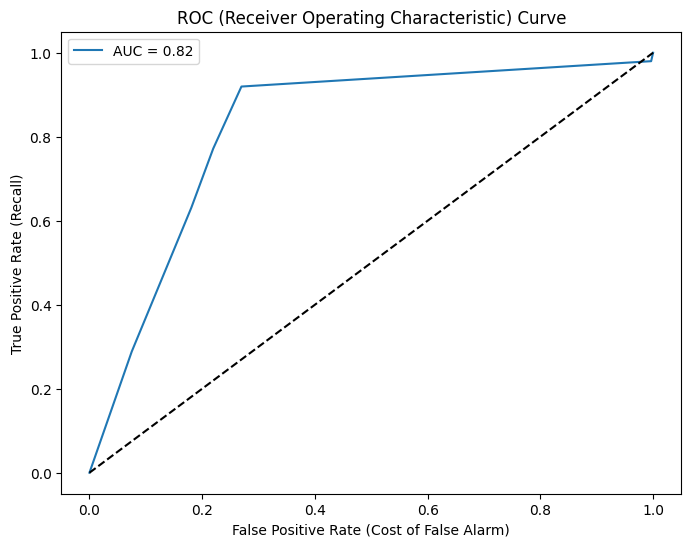

In [165]:
# Plot the ROC Curve
y_probs_D2 = dtree_pipe1_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_D2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_D2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [166]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_D2 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_D2 :.4f}')

The optimal threshold is 0.6738


**Threshold that maximizes profit**    
The threshold that maximizes profit is obtained from the precision-recall curve

In [167]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_D2)
avg_precision = average_precision_score(y_test, y_probs_D2)

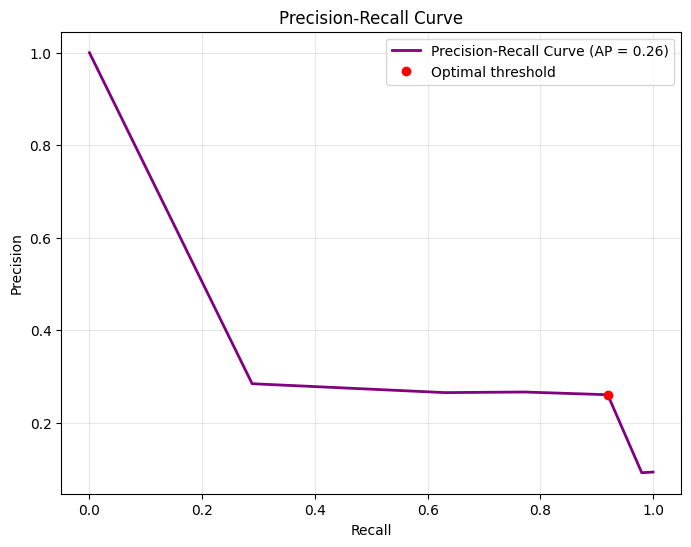

In [168]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_D2))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimal threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

In [169]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0.05, 0.80, 0.05)
for threshold in thresholds:
    preds = (y_probs_D2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.05 | Precision=0.09 | Recall=0.98
Threshold=0.10 | Precision=0.09 | Recall=0.98
Threshold=0.15 | Precision=0.09 | Recall=0.98
Threshold=0.20 | Precision=0.26 | Recall=0.92
Threshold=0.25 | Precision=0.26 | Recall=0.92
Threshold=0.30 | Precision=0.26 | Recall=0.92
Threshold=0.35 | Precision=0.26 | Recall=0.92
Threshold=0.40 | Precision=0.26 | Recall=0.92
Threshold=0.45 | Precision=0.26 | Recall=0.92
Threshold=0.50 | Precision=0.26 | Recall=0.92
Threshold=0.55 | Precision=0.26 | Recall=0.92
Threshold=0.60 | Precision=0.26 | Recall=0.92
Threshold=0.65 | Precision=0.26 | Recall=0.92
Threshold=0.70 | Precision=0.27 | Recall=0.77
Threshold=0.75 | Precision=0.28 | Recall=0.29


In [170]:
# Determine the threshold that maximizes profit
profits = []
for t in thresholds:
    y_pred = (y_probs_D2 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.2


In [171]:
# Use the threshold that maximizes profit
y_pred_D2 = (y_probs_D2 >= best_threshold).astype(int)

In [172]:
# Define the Model D2 threshold
threshold_D2 = best_threshold

**The threshold that maximizes profit and the optimal threshold from the ROC Curve produce the same metrics**     

As shown in the table of precision-recall at different thresholds and the following classification report D2, the threshold that maximizes profit and the optimal threshold from the ROC Curve produce the same metrics.  

In [173]:
# Generate classification report D2
y_pred_D2 = dtree_pipe1_opt.predict(X_test)

print(classification_report(y_test, y_pred_D2))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1439
           1       0.26      0.92      0.41       149

    accuracy                           0.75      1588
   macro avg       0.62      0.82      0.62      1588
weighted avg       0.92      0.75      0.80      1588



**Summarize model properties**

In [174]:
# Build a dataframe summarizing the model properties
dtree_model_df = pd.DataFrame({
    'Model': ['Model D1'],
    'Threshold': [threshold_D1],
    'Accuracy': [accuracy_D1],
    'Precision': [precision_D1],
    'Recall': [recall_D1],
    'F2 Score': [F2_score_D1],
    'Profit/Loss': [Profit_Loss_D1]
})
dtree_model_df

Model  Threshold  Accuracy  Precision    Recall  F2 Score  Profit/Loss
0  Model D1        0.5  0.748111   0.260952  0.919463  0.611062        41500

In [175]:
# Provide an interactive Plotly plot
fig = go.Figure()

#Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score']

for metric in metrics:
    fig.add_trace(
        go.Scatter(
          x=dtree_model_df['Model'],
          y=dtree_model_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=dtree_model_df['Model'],
          y=dtree_model_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()

**Feature importance from the Decision Tree Classifier model**     
**Customer tenure (0.130)** is the strongest predictor of churn, followed closely by **customer satisfaction (0.124)** and **engagement (0.114)** metrics. This suggests that churn risk is highest among newer, less engaged, and less satisfied customers. Operational factors such as **payment failures (0.077)** and **support resolution time (0.054)** also contribute meaningfully to churn behavior.

In [176]:
# Extract the trained tree
dt_model = dtree_pipe1.named_steps['dtree']

In [177]:
# Get feature names after preprocessing
preprocessor = dtree_pipe1.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

In [178]:
# Match importance to names
importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)

feature  importance
35         remainder__tenure_months    0.130464
47            remainder__csat_score    0.123839
36        remainder__monthly_logins    0.114440
44      remainder__payment_failures    0.077183
46   remainder__avg_resolution_time    0.054388
38      remainder__avg_session_time    0.051104
40     remainder__usage_growth_rate    0.045447
43         remainder__total_revenue    0.042209
50  remainder__marketing_click_rate    0.042188
49       remainder__email_open_rate    0.041473

In [179]:
# Clean feature names
feature_importance_df['feature'] = (
    feature_importance_df['feature']
    .str.replace('nom__','')
    .str.replace('ord__','')
    .str.replace('remainder__','')
)
feature_importance_df.head(20)

feature  importance
35                 tenure_months    0.130464
47                    csat_score    0.123839
36                monthly_logins    0.114440
44              payment_failures    0.077183
46           avg_resolution_time    0.054388
38              avg_session_time    0.051104
40             usage_growth_rate    0.045447
43                 total_revenue    0.042209
50          marketing_click_rate    0.042188
49               email_open_rate    0.041473
34                           age    0.041370
51                     nps_score    0.030825
41           last_login_days_ago    0.024237
39                 features_used    0.024154
37            weekly_active_days    0.017079
18   customer_segment_Enterprise    0.010090
5             country_Bangladesh    0.009701
52                referral_count    0.008797
24  payment_method_Bank Transfer    0.007417
21         signup_channel_Mobile    0.006746

In [180]:
# Select the first twenty features
feature_importance_df = feature_importance_df.iloc[:20]

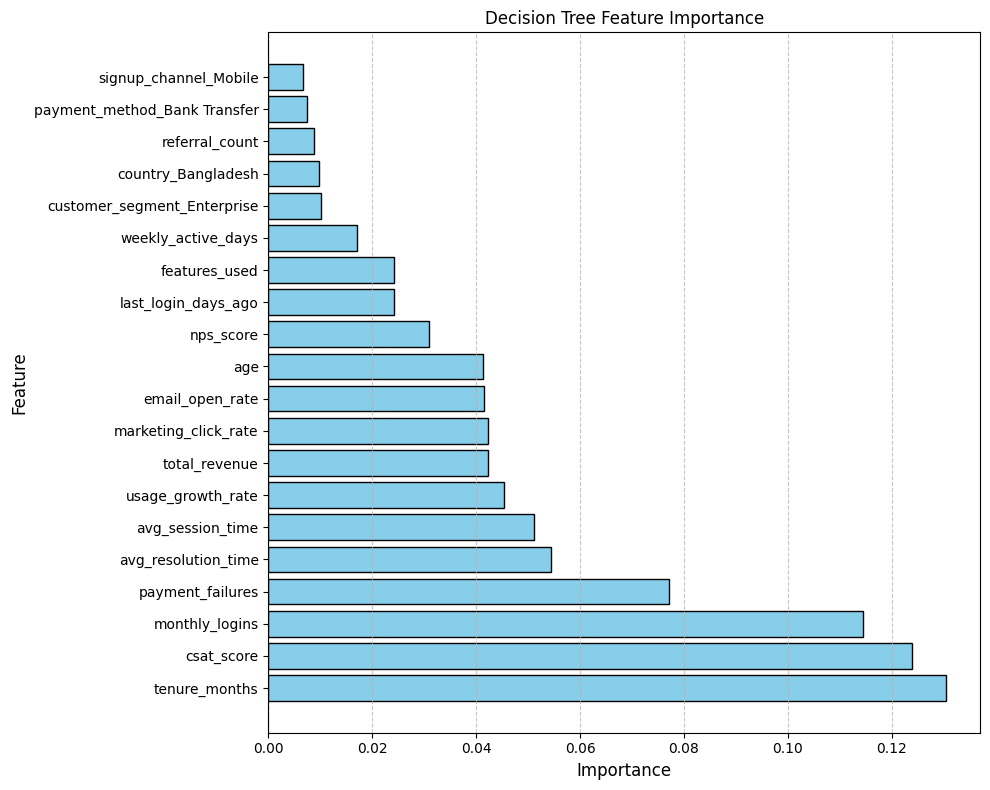

In [181]:
# Plot the feature and importance
plt.figure(figsize=(10, 8))
colors = ['skyblue']
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Build a simple K-Nearest Neighbors Classifier model**    
A simple K-Nearest Neighbors Classifier model is built and called **Model K1**.

In [182]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(
            categories=[
                ['Monthly','Quarterly','Yearly'],         # contract_type
                ['Unsatisfied','Neutral','Satisfied']     # survey_response
            ],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('nom', OneHotEncoder(
            drop=None,
            handle_unknown='ignore'
        ), nominal_cols),
    ],
    remainder=StandardScaler()
)

In [183]:
# Build a simple K-Nearest Neighbors Classifier model
knn_pipe1 = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
knn_pipe1.fit(X_train, y_train)
knn_pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('knn', KNeighborsClassifier())])

In [184]:
# Accuracy of model on train and test data
knn_pipe1_acc_train = knn_pipe1.score(X_train, y_train)
knn_pipe1_acc_test = knn_pipe1.score(X_test, y_test)

print(f'The train accuracy of the model is {knn_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {knn_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 91.04%
The test accuracy of the model is 89.99%


The simple K-Nearest Neighbors Classifier mode (**Model K1**) does not catch churners effectively (Recall = 0.01) as shown in the following classification report. This will be addressed by using a technique to balance the dataset.    
**Synthetic Minority Oversampling Technique for Nominal and Continuous features(SMOTE-NC)**     
In order to address the class imbalance, SMOTE-NC is used by the model (Model K1) and then the model is optimized. The optimized model is called **Model K2**.    
**SMOTE-NC** is a technique that tries to overcome the imbalanced dataset machine learning bias towards the majority class by creating entirely new and synthetic samples which are similar to the samples that are already in the train dataset.

In [185]:
# Generate classification report K1
y_pred_K1 = knn_pipe1.predict(X_test)

print(classification_report(y_test, y_pred_K1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1439
           1       0.08      0.01      0.01       149

    accuracy                           0.90      1588
   macro avg       0.49      0.50      0.48      1588
weighted avg       0.83      0.90      0.86      1588



In [186]:
# Define ordinal mapping
ord_mapping = [['Monthly','Quarterly','Yearly'],['Unsatisfied','Neutral','Satisfied']]

In [187]:
# Verify ordinal and nominal columns

print(f'Ordinal columns: {ordinal_cols}')
print(f'Nominal columns: {nominal_cols}')

Ordinal columns: ['contract_type', 'survey_response']
Nominal columns: ['gender', 'country', 'city', 'customer_segment', 'signup_channel', 'payment_method', 'discount_applied', 'price_increase_last_3m', 'complaint_type']


In [188]:
# Define categorical columns
categorical_cols = ordinal_cols + nominal_cols

In [189]:
# Prepare data for SMOTE-NC
pre_smote_processor = ColumnTransformer(transformers=[
        ('ord_map', OrdinalEncoder(categories=ord_mapping), ordinal_cols),
        ('nom_map', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nominal_cols),
        ('num', 'passthrough', numeric_cols)
])

In [190]:
# Prepare SMOTE-NC
cat_indices = list(range(0,11))
smote_step = SMOTENC(categorical_features=cat_indices, random_state=42)

In [191]:
# Prepare data for KNN
post_smote_processor = StandardScaler()

In [192]:
# Assemble the full pipeline
from imblearn.pipeline import Pipeline

knn_pipe2 = Pipeline(steps=[
    ('pre_smote', pre_smote_processor),
    ('smote', smote_step),
    ('post_smote', post_smote_processor),
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])
knn_pipe2.fit(X_train, y_train)
knn_pipe2

Pipeline(steps=[('pre_smote',
                 ColumnTransformer(transformers=[('ord_map',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom_map',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel'...
                                                   'monthly_fee',
                                                   'total_revenue',
                                                   'payment_failures',
                                                   'support_tickets',
                                                   'avg_resolution_time',
                                                   'csat_score', 'escalations',
                                                   'email_open_rate',
                                                   'marketing_click_rate',
                                                   'nps_score',
                                                   'referral_count'])])),
                ('smote',
                 SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10],
                         random_state=42)),
                ('post_smote', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [193]:
# Accuracy of model on train and test data
knn_pipe2_acc_train = knn_pipe2.score(X_train, y_train)
knn_pipe2_acc_test = knn_pipe2.score(X_test, y_test)

print(f'The train accuracy of the model is {knn_pipe2_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {knn_pipe2_acc_test*100:.2f}%')

The train accuracy of the model is 100.00%
The test accuracy of the model is 47.80%


In [194]:
# Set up parameter grid
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]
}

In [195]:
# Run GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_knn = GridSearchCV(
    estimator=knn_pipe2,
    param_grid=param_grid_knn,
    cv=cv,
    n_jobs=-1,
    scoring='roc_auc',
    error_score='raise'
)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('pre_smote',
                                        ColumnTransformer(transformers=[('ord_map',
                                                                         OrdinalEncoder(categories=[['Monthly',
                                                                                                     'Quarterly',
                                                                                                     'Yearly'],
                                                                                                    ['Unsatisfied',
                                                                                                     'Neutral',
                                                                                                     'Satisfied']]),
                                                                         ['contract_type',
                                                                          'survey_response']),
                                                                        ('nom_map',
                                                                         OrdinalEncoder(handle_unkno...
                                                                          'referral_count'])])),
                                       ('smote',
                                        SMOTENC(categorical_features=[0, 1, 2,
                                                                      3, 4, 5,
                                                                      6, 7, 8,
                                                                      9, 10],
                                                random_state=42)),
                                       ('post_smote', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(weights='distance'))]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 11, 15],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [196]:
# Verify the best parameters

print(f'Best parameters: {grid_knn.best_params_}')

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'uniform'}


In [197]:
# Access the optimized model
knn_pipe2_opt = grid_knn.best_estimator_
knn_pipe2_opt

Pipeline(steps=[('pre_smote',
                 ColumnTransformer(transformers=[('ord_map',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom_map',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel'...
                                                   'total_revenue',
                                                   'payment_failures',
                                                   'support_tickets',
                                                   'avg_resolution_time',
                                                   'csat_score', 'escalations',
                                                   'email_open_rate',
                                                   'marketing_click_rate',
                                                   'nps_score',
                                                   'referral_count'])])),
                ('smote',
                 SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10],
                         random_state=42)),
                ('post_smote', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15,
                                      p=1))])

In [198]:
# Accuracy on train and test data
knn_pipe2_opt_acc_train = knn_pipe2_opt.score(X_train, y_train)
knn_pipe2_opt_acc_test = knn_pipe2_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {knn_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {knn_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 64.91%
The test accuracy of the model is 54.35%


In [199]:
# Define the Model K2 threshold (default)
threshold_K2 = 0.5

In [200]:
# Generate classification report K2
y_pred_K2 = knn_pipe2_opt.predict(X_test)

print(classification_report(y_test, y_pred_K2))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1439
           1       0.13      0.66      0.21       149

    accuracy                           0.54      1588
   macro avg       0.53      0.60      0.45      1588
weighted avg       0.86      0.54      0.63      1588



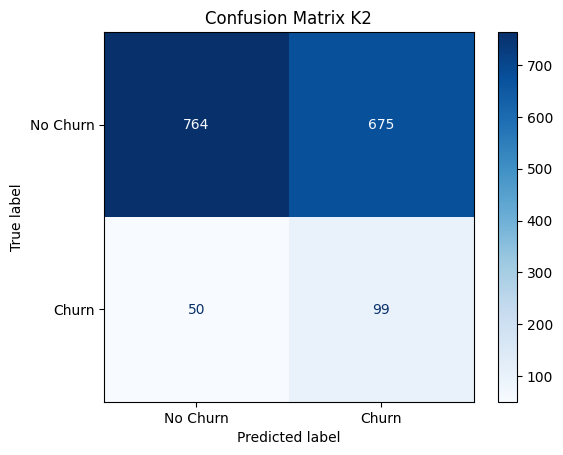

In [201]:
# Display confusion matrix K2
conf_matrix_K2 = confusion_matrix(y_test, y_pred_K2)
disp_K2 = ConfusionMatrixDisplay(conf_matrix_K2, display_labels=['No Churn','Churn'])
disp_K2.plot(cmap='Blues')
plt.title('Confusion Matrix K2')
plt.show()

In [202]:
# Values for false positive (fp_K2), false negative (fn_K2), true positive (tp_K2) and true negative (tn_K2)
fp_K2 = conf_matrix_K2[0][1]
fn_K2 = conf_matrix_K2[1][0]
tp_K2 = conf_matrix_K2[1][1]
tn_K2 = conf_matrix_K2[0][0]

print(f' fp_K2: {fp_K2} \n fn_K2: {fn_K2} \n tp_K2: {tp_K2} \n tn_K2: {tn_K2}')

 fp_K2: 675 
 fn_K2: 50 
 tp_K2: 99 
 tn_K2: 764


In [203]:
# Calculations for accuracy, precision, recall
accuracy_K2 = (tp_K2 + tn_K2)/len(y_test)
precision_K2 = tp_K2/(tp_K2 + fp_K2)
recall_K2 = tp_K2/(tp_K2 + fn_K2)

print(f'Accuracy_K2: {accuracy_K2:.2f}')
print(f'Precision_K2: {precision_K2:.2f}')
print(f'Recall_K2: {recall_K2:.2f}')
print(f'-'*28)

Accuracy_K2: 0.54
Precision_K2: 0.13
Recall_K2: 0.66
----------------------------


In [204]:
# Calculate F2 score for Model K2
beta = 2
F2_score_K2 = (1 + beta**2) * (precision_K2 * recall_K2) / (beta**2 * precision_K2 + recall_K2)

print(f'The F2 score for Model K2 is {F2_score_K2:.4f}')

The F2 score for Model K2 is 0.3613


In [205]:
# Profit/loss analysis for Model K2
Profit_Loss_K2 = tp_K2*(L - C) - fp_K2*C - fn_K2*L

print(f'The profit or loss is ${Profit_Loss_K2}')

The profit or loss is $-6460


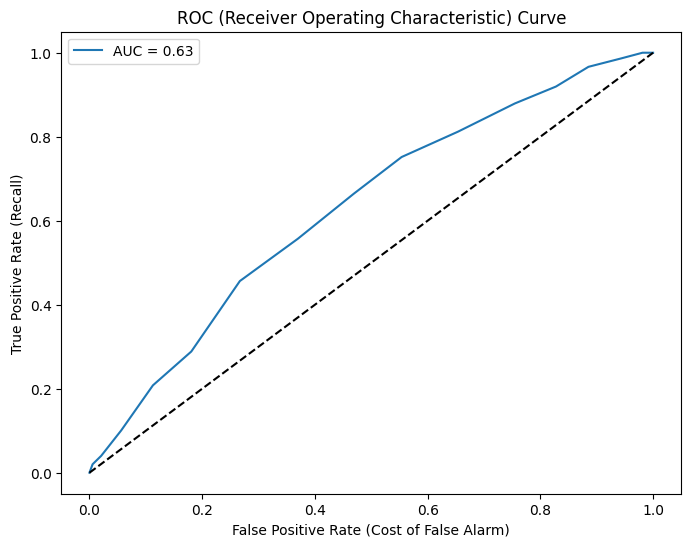

In [206]:
# Plot the ROC Curve
y_probs_K2 = knn_pipe2_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_K2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_K2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [207]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_K1 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_K1 :.1f}')

The optimal threshold is 0.5


In [208]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_K2)
avg_precision = average_precision_score(y_test, y_probs_K2)

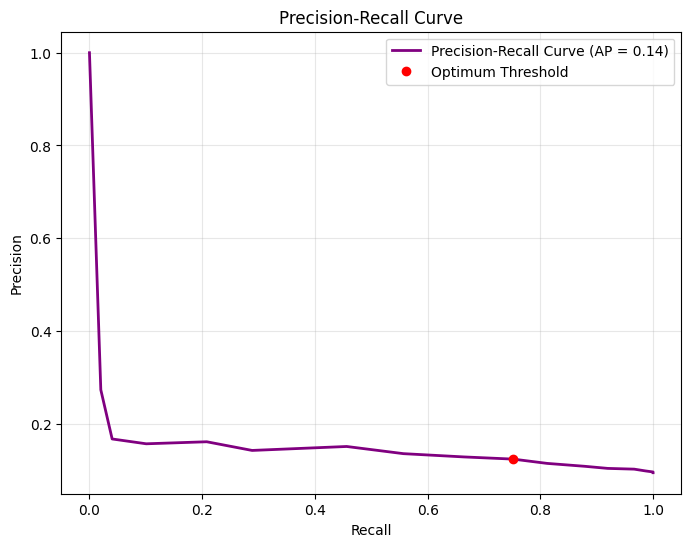

In [209]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_K1))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimum Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

In [210]:
# Evaluate precision and recall at different thresholds
y_probs_K2 = knn_pipe2_opt.predict_proba(X_test)[:, 1]
thresholds = np.arange(0, 0.7, 0.05)
for threshold in thresholds:
    preds = (y_probs_K2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.00 | Precision=0.09 | Recall=1.00
Threshold=0.05 | Precision=0.10 | Recall=1.00
Threshold=0.10 | Precision=0.10 | Recall=0.99
Threshold=0.15 | Precision=0.10 | Recall=0.97
Threshold=0.20 | Precision=0.10 | Recall=0.97
Threshold=0.25 | Precision=0.10 | Recall=0.92
Threshold=0.30 | Precision=0.11 | Recall=0.88
Threshold=0.35 | Precision=0.11 | Recall=0.81
Threshold=0.40 | Precision=0.11 | Recall=0.81
Threshold=0.45 | Precision=0.12 | Recall=0.75
Threshold=0.50 | Precision=0.13 | Recall=0.66
Threshold=0.55 | Precision=0.13 | Recall=0.56
Threshold=0.60 | Precision=0.15 | Recall=0.46
Threshold=0.65 | Precision=0.15 | Recall=0.46


In [211]:
# Determine the threshold that maximizes profit
profits = []
for t in thresholds:
    y_pred = (y_probs_K2 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.15000000000000002


**Model K2 uses the threshold maximizing profits**

In [212]:
# Define the Model K2 threshold
threshold_K2 = best_threshold

In [213]:
# Use the threshold maximizing profits
y_pred_K2 = (y_probs_K2 >= best_threshold).astype(int)

In [214]:
# Generate classification report K2

print(classification_report(y_test, y_pred_K2))

              precision    recall  f1-score   support

           0       0.97      0.11      0.21      1439
           1       0.10      0.97      0.18       149

    accuracy                           0.19      1588
   macro avg       0.54      0.54      0.19      1588
weighted avg       0.89      0.19      0.20      1588



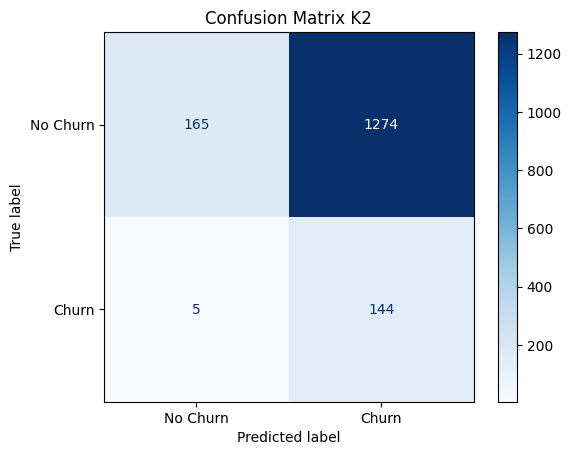

In [215]:
# Display confusion matrix K1
conf_matrix_K2 = confusion_matrix(y_test, y_pred_K2)
disp_K2 = ConfusionMatrixDisplay(conf_matrix_K2, display_labels=['No Churn','Churn'])
disp_K2.plot(cmap='Blues')
plt.title('Confusion Matrix K2')
plt.show()

In [216]:
# Values for false positive (fp_K2), false negative (fn_K2), true positive (tp_K2) and true negative (tn_K2)
fp_K2 = conf_matrix_K2[0][1]
fn_K2 = conf_matrix_K2[1][0]
tp_K2 = conf_matrix_K2[1][1]
tn_K2 = conf_matrix_K2[0][0]

print(f' fp_K2: {fp_K2} \n fn_K2: {fn_K2} \n tp_K2: {tp_K2} \n tn_K2: {tn_K2}')

 fp_K2: 1274 
 fn_K2: 5 
 tp_K2: 144 
 tn_K2: 165


In [217]:
# Calculations for accuracy, precision, recall
accuracy_K2 = (tp_K2 + tn_K2)/len(y_test)
precision_K2 = tp_K2/(tp_K2 + fp_K2)
recall_K2 = tp_K2/(tp_K2 + fn_K2)

print(f'Accuracy_K2: {accuracy_K2:.2f}')
print(f'Precision_K2: {precision_K2:.2f}')
print(f'Recall_K2: {recall_K2:.2f}')
print(f'-'*28)

Accuracy_K2: 0.19
Precision_K2: 0.10
Recall_K2: 0.97
----------------------------


In [218]:
# Calculate F2 score for Model K2
beta = 2
F2_score_K2 = (1 + beta**2) * (precision_K2 * recall_K2) / (beta**2 * precision_K2 + recall_K2)

print(f'The F2 score for Model K2 is {F2_score_K2:.4f}')

The F2 score for Model K2 is 0.3575


In [219]:
# Profit/loss analysis for Model K2
Profit_Loss_K2 = tp_K2*(L - C) - fp_K2*C - fn_K2*L

print(f'The profit or loss is ${Profit_Loss_K2}')

The profit or loss is $12780


**Summarize model properties**

In [220]:
# Build a dataframe summarizing the model properties
knn_model_df = pd.DataFrame({
    'Model': ['Model K2'],
    'Threshold': [threshold_K2],
    'Accuracy': [accuracy_K2],
    'Precision': [precision_K2],
    'Recall': [recall_K2],
    'F2 Score': [F2_score_K2],
    'Profit/Loss': [Profit_Loss_K2]
})
knn_model_df

Model  Threshold  Accuracy  Precision    Recall  F2 Score  Profit/Loss
0  Model K2       0.15  0.194584   0.101551  0.966443  0.357498        12780

In [221]:
# Provide an interactive Plotly plot
fig = go.Figure()

#Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score']

for metric in metrics:
    fig.add_trace(
        go.Scatter(
          x=knn_model_df['Model'],
          y=knn_model_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=knn_model_df['Model'],
          y=knn_model_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()

**Feature importance from the K-Nearest Neighbors Classifier model**

In [222]:
# Use permutation importance
result = permutation_importance(
    knn_pipe2,
    X_test,
    y_test,
    n_repeats=20,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

In [223]:
# Interpret the results
importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': result.importances_mean
}).sort_values(by='importance_mean', ascending=False)

importances_df.head(20)

feature  importance_mean
23              csat_score         0.011144
18        discount_applied         0.008477
17        payment_failures         0.005040
9       weekly_active_days         0.003126
11           features_used         0.002514
12       usage_growth_rate         0.000963
10        avg_session_time         0.000879
15           total_revenue        -0.000361
7            contract_type        -0.000554
26    marketing_click_rate        -0.000593
28         survey_response        -0.000620
19  price_increase_last_3m        -0.001238
16          payment_method        -0.001309
29          referral_count        -0.001735
0                   gender        -0.002021
24             escalations        -0.002445
21     avg_resolution_time        -0.002589
8           monthly_logins        -0.002888
25         email_open_rate        -0.003585
14             monthly_fee        -0.003592

In [224]:
# Select the first twenty features
importances_df = importances_df.iloc[:20]

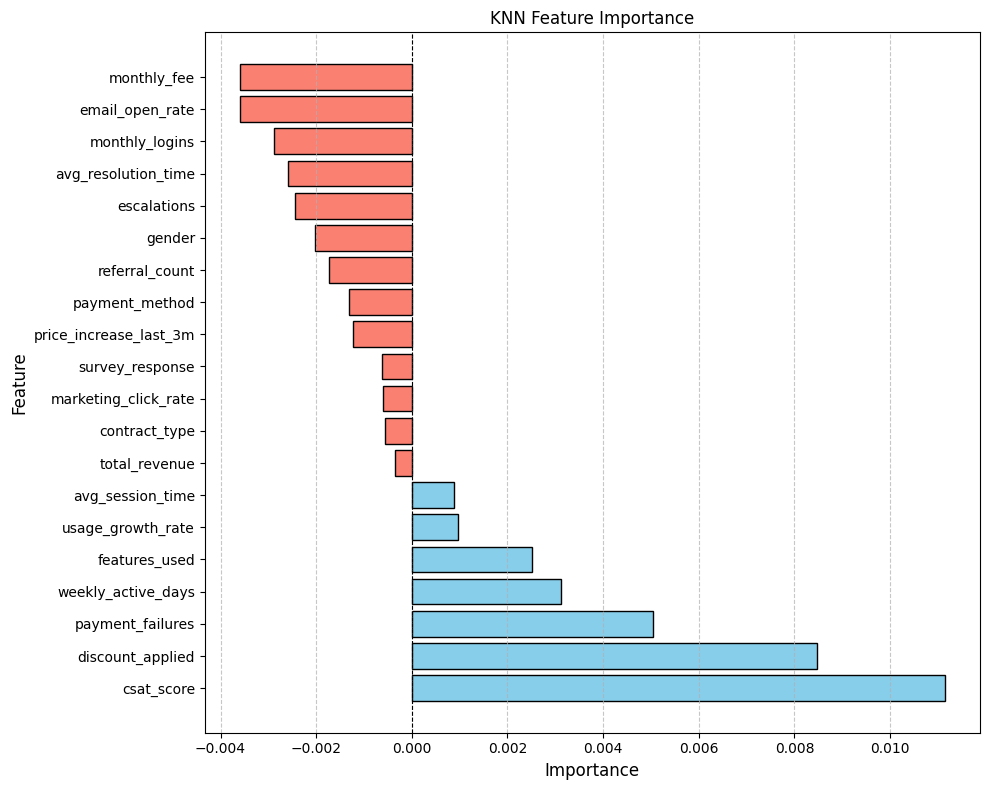

In [225]:
# Plot the important features and importance_means
plt.figure(figsize=(10, 8))
colors = ['salmon' if x < 0 else 'skyblue' for x in importances_df['importance_mean']]
plt.barh(importances_df['feature'], importances_df['importance_mean'], color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('KNN Feature Importance')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Feature importance in K-Neighbors Classifier using permutation importance**      
The model finds the features **csat_score**, **discount_applied**, and **payment_failures** to be highly important.
Feature importance in KNN is inferred using permutation importance where one feature is shuffled randomly at a time. The change in model performance is then measured - the drop in performance, for example, is inferred as the magnitude of feature importance.     
**csat_score	0.011** has the largest drop in performance and is, therefore, the most important feature - customers who leave don't leave randomly but because they are unhappy; unhappiness precedes churn     
**discount_applied	0.008**  customers might be price sensitive; churn happens when promotional periods end; the high importance means that the presence or absence of a discount is a major factor in a customer's decision to stay or not to stay     
**payment_failures	0.005**  this is sometimes known as involuntary churn; if a card expires or a bank rejects a payment, some customers don't bother to update their info - they just let the account die    

**Build a simple Support Vector Classifier model**    
A simple Support Vector Classifier model is built and called **Model S1**.

In [226]:
# Prepare the preprocessor for encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(
            categories=[
                ['Monthly','Quarterly','Yearly'],         # contract_type
                ['Unsatisfied','Neutral','Satisfied']     # survey_response
            ],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('nom', OneHotEncoder(
            drop=None,
            handle_unknown='ignore'
        ), nominal_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [227]:
# Build pipeline
from sklearn.pipeline import Pipeline

svc_pipe1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=42))
])
svc_pipe1.fit(X_train, y_train)
svc_pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment...
                                                  ['age', 'tenure_months',
                                                   'monthly_logins',
                                                   'weekly_active_days',
                                                   'avg_session_time',
                                                   'features_used',
                                                   'usage_growth_rate',
                                                   'last_login_days_ago',
                                                   'monthly_fee',
                                                   'total_revenue',
                                                   'payment_failures',
                                                   'support_tickets',
                                                   'avg_resolution_time',
                                                   'csat_score', 'escalations',
                                                   'email_open_rate',
                                                   'marketing_click_rate',
                                                   'nps_score',
                                                   'referral_count'])])),
                ('svc', SVC(random_state=42))])

In [228]:
# Accuracy of model on train and test data
svc_pipe1_acc_train = svc_pipe1.score(X_train, y_train)
svc_pipe1_acc_test = svc_pipe1.score(X_test, y_test)

print(f'The train accuracy of the model is {svc_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {svc_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 90.63%
The test accuracy of the model is 90.62%


As shown in the following classification report, the simple model is unable to catch churners (Recall = 0.00). The next model addresses the data imbalance and is optimized.

In [229]:
# Generate classification report S1
y_pred_S1 = svc_pipe1.predict(X_test)

print(classification_report(y_test, y_pred_S1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1439
           1       0.00      0.00      0.00       149

    accuracy                           0.91      1588
   macro avg       0.45      0.50      0.48      1588
weighted avg       0.82      0.91      0.86      1588



**Improve the Support Vector Classifier model**     
The next Support Vector Classifier model uses the parameter class_weight='balanced' and then the model is optimized. The model is called **Model S2**.

In [230]:
# Use the parameter class_weight='balanced' to address the imbalanced dataset
svc_pipe2 = Pipeline([
    ('transformer', transformer),
    ('svc', SVC(class_weight='balanced', probability=True, random_state=42))
])
svc_pipe2.fit(X_train, y_train)
svc_pipe2

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('svc',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [231]:
# Define parameter grid
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 0.01, 0.1]
}

In [232]:
# Run RandomizedSearchCV
grid_svc = RandomizedSearchCV(
    estimator=svc_pipe2,
    param_distributions=param_grid_svc,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
grid_svc.fit(X_train, y_train)

print(f'The best parameters are {grid_svc.best_params_}')
print(f'The best score is {grid_svc.best_score_:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are {'svc__kernel': 'poly', 'svc__gamma': 0.01, 'svc__C': 10}
The best score is 0.3224


In [233]:
# Access the optimized pipeline model
svc_pipe2_opt = grid_svc.best_estimator_
svc_pipe2_opt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Monthly',
                                                                              'Quarterly',
                                                                              'Yearly'],
                                                                             ['Unsatisfied',
                                                                              'Neutral',
                                                                              'Satisfied']]),
                                                  ['contract_type',
                                                   'survey_response']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country', 'city',
                                                   'customer_segment',
                                                   'signup_channel',
                                                   'payment_method',
                                                   'discount_applied',
                                                   'price_increase_last_3m',
                                                   'complaint_type'])])),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.01, kernel='poly',
                     probability=True, random_state=42))])

In [234]:
# Accuracy on train and test data
svc_pipe2_opt_acc_train = svc_pipe2_opt.score(X_train, y_train)
svc_pipe2_opt_acc_test = svc_pipe2_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {svc_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {svc_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 86.17%
The test accuracy of the model is 78.27%


In [235]:
# Generate classification report S2
y_pred_S2 = svc_pipe2_opt.predict(X_test)

print(classification_report(y_test, y_pred_S2))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1439
           1       0.22      0.50      0.30       149

    accuracy                           0.78      1588
   macro avg       0.58      0.66      0.59      1588
weighted avg       0.87      0.78      0.82      1588



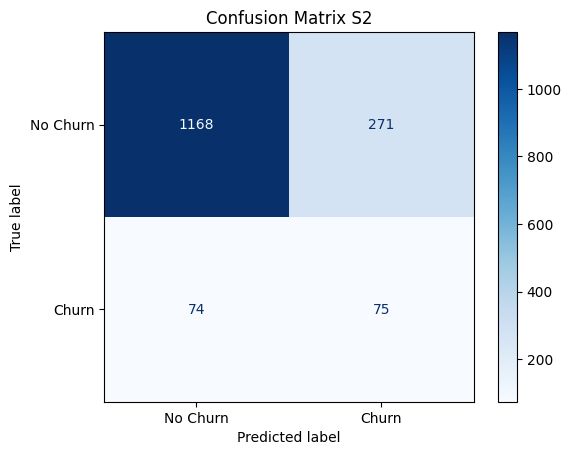

In [236]:
# Display confusion matrix S2
conf_matrix_S2 = confusion_matrix(y_test, y_pred_S2)
disp_S2 = ConfusionMatrixDisplay(conf_matrix_S2, display_labels=['No Churn','Churn'])
disp_S2.plot(cmap='Blues')
plt.title('Confusion Matrix S2')
plt.show()

In [237]:
# Values for false positive (fp_S2), false negative (fn_S2), true positive (tp_S2) and true negative (tn_S2)
fp_S2 = conf_matrix_S2[0][1]
fn_S2 = conf_matrix_S2[1][0]
tp_S2 = conf_matrix_S2[1][1]
tn_S2 = conf_matrix_S2[0][0]

print(f' fp_S2: {fp_S2} \n fn_S2: {fn_S2} \n tp_S2: {tp_S2} \n tn_S2: {tn_S2}')

 fp_S2: 271 
 fn_S2: 74 
 tp_S2: 75 
 tn_S2: 1168


In [238]:
# Calculations for accuracy, precision, recall
accuracy_S2 = (tp_S2 + tn_S2)/len(y_test)
precision_S2 = tp_S2/(tp_S2 + fp_S2)
recall_S2 = tp_S2/(tp_S2 + fn_S2)

print(f'Accuracy_S2: {accuracy_S2:.2f}')
print(f'Precision_S2: {precision_S2:.2f}')
print(f'Recall_S2: {recall_S2:.2f}')
print(f'-'*28)

Accuracy_S2: 0.78
Precision_S2: 0.22
Recall_S2: 0.50
----------------------------


In [239]:
# Calculate F2 score for Model S2
beta = 2
F2_score_S2 = (1 + beta**2) * (precision_S2 * recall_S2) / (beta**2 * precision_S2 + recall_S2)

print(f'The F2 score for Model S2 is {F2_score_S2:.4f}')

The F2 score for Model S2 is 0.3981


In [240]:
# Profit/loss analysis for Model S2
Profit_Loss_S2 = tp_S2*(L - C) - fp_S2*C - fn_S2*L

print(f'The profit or loss is ${Profit_Loss_S2}')

The profit or loss is $-13340


In [241]:
# Define the Model S2 threshold
threshold_S2 = 0.50

**Model S3** uses the threshold that maximizes profit. While the optimal threshold from the ROC Curve increases recall, it does not maximize profit.

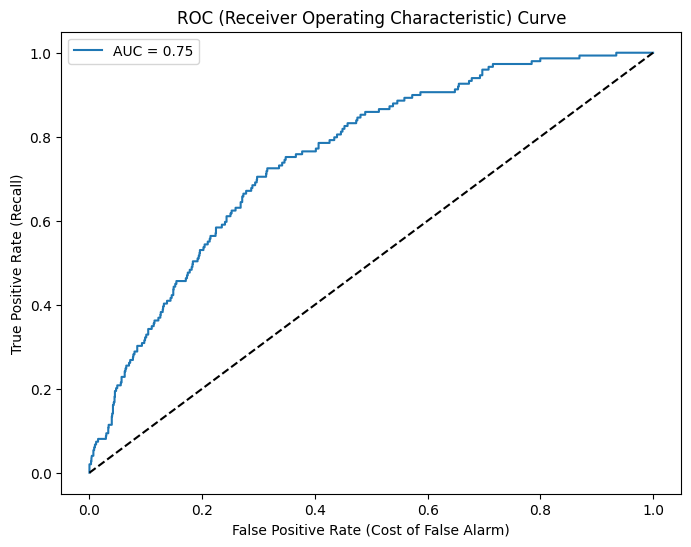

In [242]:
# Plot the ROC Curve
y_probs_S3 = svc_pipe2_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_S3)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_S3):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [243]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_S3 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_S3 :.2f}')

The optimal threshold is 0.09


In [244]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_S3)
avg_precision = average_precision_score(y_test, y_probs_S3)

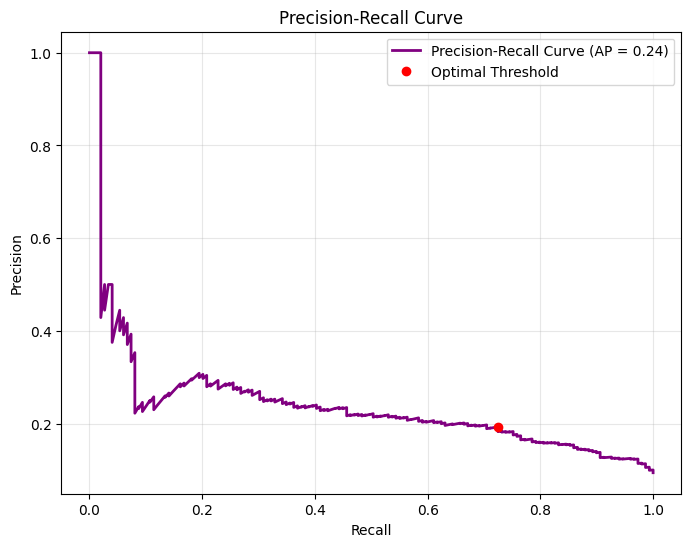

In [245]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_S3))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimal Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

In [246]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0, 0.5, 0.05)
for threshold in thresholds:
    preds = (y_probs_S3 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.00 | Precision=0.09 | Recall=1.00
Threshold=0.05 | Precision=0.13 | Recall=0.91
Threshold=0.10 | Precision=0.19 | Recall=0.68
Threshold=0.15 | Precision=0.23 | Recall=0.45
Threshold=0.20 | Precision=0.27 | Recall=0.30
Threshold=0.25 | Precision=0.30 | Recall=0.21
Threshold=0.30 | Precision=0.23 | Recall=0.09
Threshold=0.35 | Precision=0.33 | Recall=0.08
Threshold=0.40 | Precision=0.41 | Recall=0.06
Threshold=0.45 | Precision=0.46 | Recall=0.04


In [247]:
# Determine the threshold that maximizes profit
profits = []
for t in thresholds:
    y_pred = (y_probs_S3 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.05


In [248]:
# Define the Model S3 threshold
threshold_S3 = best_threshold

In [249]:
# Use the best threshold
y_pred_S3 = (y_probs_S3 >= threshold_S3).astype(int)

In [250]:
# Generate classification report S3

print(classification_report(y_test, y_pred_S3))

              precision    recall  f1-score   support

           0       0.97      0.37      0.54      1439
           1       0.13      0.91      0.23       149

    accuracy                           0.42      1588
   macro avg       0.55      0.64      0.38      1588
weighted avg       0.90      0.42      0.51      1588



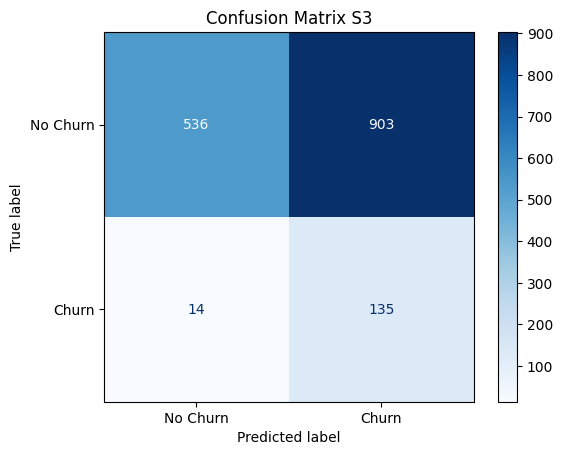

In [251]:
# Display confusion matrix S3
conf_matrix_S3 = confusion_matrix(y_test, y_pred_S3)
disp_S3 = ConfusionMatrixDisplay(conf_matrix_S3, display_labels=['No Churn','Churn'])
disp_S3.plot(cmap='Blues')
plt.title('Confusion Matrix S3')
plt.show()

In [252]:
# Values for false positive (fp_S3), false negative (fn_S3), true positive (tp_S3) and true negative (tn_S3)
fp_S3 = conf_matrix_S3[0][1]
fn_S3 = conf_matrix_S3[1][0]
tp_S3 = conf_matrix_S3[1][1]
tn_S3 = conf_matrix_S3[0][0]

print(f' fp_S3: {fp_S3} \n fn_S3: {fn_S3} \n tp_S3: {tp_S3} \n tn_S3: {tn_S3}')

 fp_S3: 903 
 fn_S3: 14 
 tp_S3: 135 
 tn_S3: 536


In [253]:
# Calculations for accuracy, precision, recall
accuracy_S3 = (tp_S3 + tn_S3)/len(y_test)
precision_S3 = tp_S3/(tp_S3 + fp_S3)
recall_S3 = tp_S3/(tp_S3 + fn_S3)

print(f'Accuracy_S3: {accuracy_S3:.2f}')
print(f'Precision_S3: {precision_S3:.2f}')
print(f'Recall_S3: {recall_S3:.2f}')
print(f'-'*28)

Accuracy_S3: 0.42
Precision_S3: 0.13
Recall_S3: 0.91
----------------------------


In [254]:
# Calculate F2 score for Model S3
beta = 2
F2_score_S3 = (1 + beta**2) * (precision_S3 * recall_S3) / (beta**2 * precision_S3 + recall_S3)

print(f'The F2 score for Model S3 is {F2_score_S3:.4f}')

The F2 score for Model S3 is 0.4131


In [255]:
# Profit/loss analysis for Model S3
Profit_Loss_S3 = tp_S3*(L - C) - fp_S3*C - fn_S3*L

print(f'The profit or loss is ${Profit_Loss_S3}')

The profit or loss is $18980


**SVC Models Summary**    
With a recall of 95%, **Model S3** provides a higher profit.


In [256]:
# Build a dataframe summarizing the model properties
svc_model_df = pd.DataFrame({
    'Model': ['Model S2','Model S3'],
    'Threshold': [threshold_S2, threshold_S3],
    'Accuracy': [accuracy_S2, accuracy_S3],
    'Precision': [precision_S2, precision_S3],
    'Recall': [recall_S2, recall_S3],
    'F2 Score': [F2_score_S2, F2_score_S3],
    'Profit/Loss': [Profit_Loss_S2, Profit_Loss_S3]
})
svc_model_df

Model  Threshold  Accuracy  Precision    Recall  F2 Score  Profit/Loss
0  Model S2       0.50  0.782746   0.216763  0.503356  0.398089       -13340
1  Model S3       0.05  0.422544   0.130058  0.906040  0.413097        18980

In [257]:
# Provide an interactive Plotly plot
fig = go.Figure()

#Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score']

for metric in metrics:
  fig.add_trace(
        go.Scatter(
          x=svc_model_df['Model'],
          y=svc_model_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=svc_model_df['Model'],
          y=svc_model_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()

**Feature importance from the Support Vector Classifier model**     
The model finds the features **csat_score**, **monthly_logins**, and **payment_failures** to be highly important.     
**csat_score** is the most important feature and is the strongest predictor of churn. Lower score increases the churn probability. In order to reduce churn, satisfaction should be improved.     
**monthly_logins** is the second most important feature. Customers who log in less frequently are more likely to churn. Customers with high engagement have low churn risk.     
**payment_failures** is almost as important as engagement. Customers experiencing payment issues are at a higher risk of churn. Billing friction or financial dissatisfaction could be an issue.

In [258]:
# Use permutation importance
result = permutation_importance(
    svc_pipe2,
    X_test,
    y_test,
    n_repeats=20,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

In [259]:
# Interpret the results
importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': result.importances_mean
}).sort_values(by='importance_mean', ascending=False)

importances_df.head(20)

feature  importance_mean
23              csat_score         0.073673
8           monthly_logins         0.030886
17        payment_failures         0.029574
14             monthly_fee         0.011926
11           features_used         0.009185
20         support_tickets         0.008357
9       weekly_active_days         0.007112
21     avg_resolution_time         0.006273
5            tenure_months         0.005357
1                      age         0.004511
4         customer_segment         0.003210
29          referral_count         0.002179
19  price_increase_last_3m         0.001513
10        avg_session_time         0.001241
7            contract_type         0.000713
2                  country         0.000365
18        discount_applied        -0.001116
12       usage_growth_rate        -0.002266
6           signup_channel        -0.002615
0                   gender        -0.002924

In [260]:
# Select the first twenty features
importances_df = importances_df.iloc[:20]

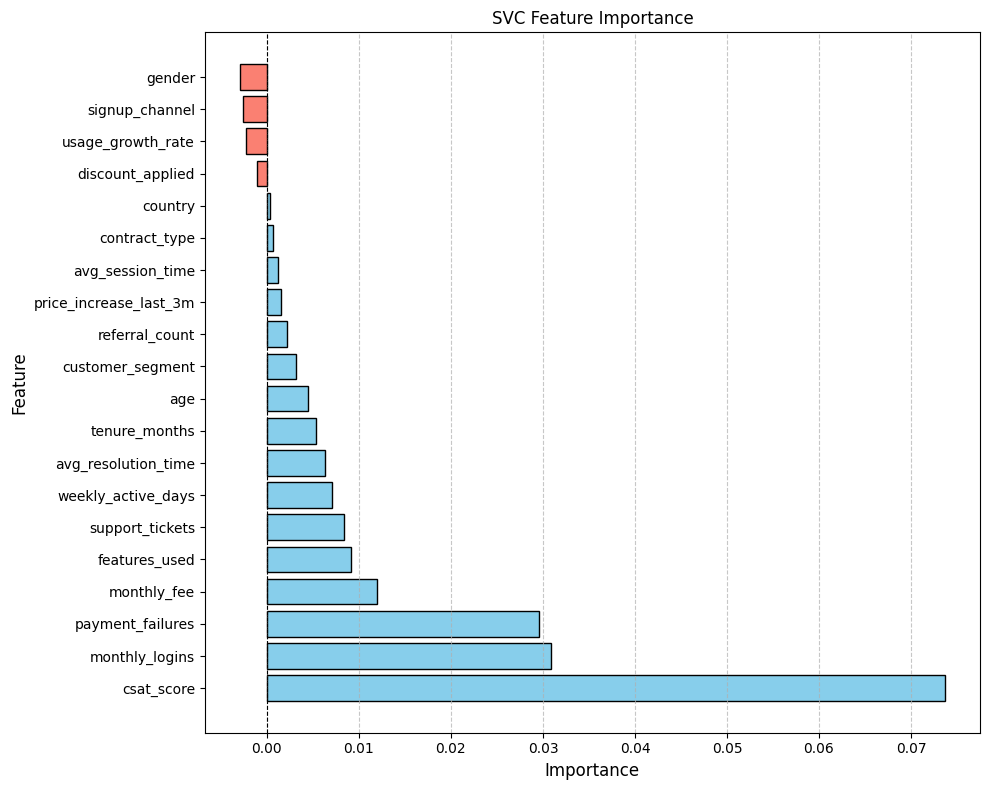

In [261]:
# Plot the important features and importance_means
plt.figure(figsize=(10, 8))
colors = ['salmon' if x < 0 else 'skyblue' for x in importances_df['importance_mean']]
plt.barh(importances_df['feature'], importances_df['importance_mean'], color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('SVC Feature Importance')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Overall Model Summary**     
The **Decision Tree Classifier Model D1** is the clear winner. For this particular dataset, Decision Tree Classifier is the recommended machine learning algorithm.    
The Decision Tree Classifier model has the highest Profit, accuracy, precision, F2 Score and AUC. While it is last in terms of recall, it is is more than made up by its higher accuracy and precision.   

In [262]:
# Build the model comparison dataframe
comparison_models_df = pd.DataFrame({
    'Model': ['Decision Tree D1','Logistic Regression L3', 'Support Vector Classifier S3','K-Nearest Neighbors K2'],
    'Accuracy': [accuracy_D1, accuracy_L3, accuracy_S3, accuracy_K2],
    'Precision': [precision_D1, precision_L3, precision_S3, precision_K2],
    'Recall': [recall_D1, recall_L3, recall_S3, recall_K2],
    'F2 Score': [F2_score_D1, F2_score_L3, F2_score_S3, F2_score_K2],
    'AUC': [roc_auc_score(y_test, y_probs_D2), roc_auc_score(y_test, y_probs1), roc_auc_score(y_test, y_probs_S3),
            roc_auc_score(y_test, y_probs_K2)],
    'Profit/Loss': [Profit_Loss_D1, Profit_Loss_L3, Profit_Loss_S3, Profit_Loss_K2]
})
comparison_models_df

Model  Accuracy  Precision    Recall  F2 Score  \
0              Decision Tree D1  0.748111   0.260952  0.919463  0.611062   
1        Logistic Regression L3  0.330605   0.119800  0.966443  0.400445   
2  Support Vector Classifier S3  0.422544   0.130058  0.906040  0.413097   
3        K-Nearest Neighbors K2  0.194584   0.101551  0.966443  0.357498   

        AUC  Profit/Loss  
0  0.822740        41500  
1  0.735718        21420  
2  0.754367        18980  
3  0.630052        12780

In [263]:
# Provide an interactive Plotly plot
fig = go.Figure()

# Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score', 'AUC']

for metric in metrics:
    fig.add_trace(
        go.Scatter(
          x=comparison_models_df['Model'],
          y=comparison_models_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=comparison_models_df['Model'],
          y=comparison_models_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()

**Sample 1 prediction by Model D1**     
In this particular instance, the model is able to catch the churner (its prediction is a true positive). The actual churn is '1' while the prediction is '1'.

In [264]:
# Obtain a sample from the test data
df_test1 = X_test[264:265]

print(df_test1.head().T, '\n')
print(f'Actual churn is {list(y_test[264:265])[0]}') # verify churn

                                 2294
gender                         Female
age                                62
country                        Canada
city                           Sydney
customer_segment           Individual
tenure_months                      18
signup_channel               Referral
contract_type                 Monthly
monthly_logins                     19
weekly_active_days                  1
avg_session_time            23.353293
features_used                       5
usage_growth_rate               -0.01
last_login_days_ago                 5
monthly_fee                        50
total_revenue                     900
payment_method          Bank Transfer
payment_failures                    2
discount_applied                   No
price_increase_last_3m             No
support_tickets                     2
avg_resolution_time         24.419612
complaint_type                Billing
csat_score                        3.0
escalations                         0
email_open_r

In [265]:
# Transfer the data to a dictionary
sample1 = {
    "gender": "Female",
    "age": 62,
    "country": "Canada",
    "city": "Sydney",
    "customer_segment": "Individual",
    "tenure_months": 18,
    "signup_channel": "Referral",
    "contract_type": "Monthly",
    "monthly_logins": 19,
    "weekly_active_days": 1,
    "avg_session_time": 23.353293,
    "features_used": 5,
    "usage_growth_rate": -0.01,
    "last_login_days_ago": 5,
    "monthly_fee": 50,
    "total_revenue": 900,
    "payment_method": "Bank Transfer",
    "payment_failures": 2,
    "discount_applied": "No",
    "price_increase_last_3m": "No",
    "support_tickets": 2,
    "avg_resolution_time": 24.419612,
    "complaint_type": "Billing",
    "csat_score": 3.0,
    "escalations": 0,
    "email_open_rate": 0.33,
    "marketing_click_rate": 0.49,
    "nps_score": -15,
    "survey_response": "Satisfied",
    "referral_count": 1
}

In [266]:
# Calculate churn probability of the sample and provide churn of the sample
probability1 = dtree_pipe1_opt.predict_proba(pd.DataFrame([sample1]))[:, 1][0]

if probability1 >= threshold_D1:
    print(f'The predicted churn is 1 \n')
else:
    print(f'The predicted churn is 0 \n')

print(f'The predicted churn probability is {probability1:.2f}')

The predicted churn is 1 

The predicted churn probability is 0.67


**Sample 2 prediction by Model D1**     
For this sample, the model correctly predicted a non-churner (its prediction is a true negative). The actual churn is '0' while the prediction is '0'.

In [267]:
# Obtain a sample from the test data
df_test2 = X_test[399:400]

print(df_test2.head().T, '\n')
print(f'The actual churn is {list(y_test[399:400])[0]}') # verify churn

                             1850
gender                       Male
age                            33
country                     India
city                     New York
customer_segment              SME
tenure_months                  40
signup_channel             Mobile
contract_type           Quarterly
monthly_logins                 10
weekly_active_days              2
avg_session_time        20.705153
features_used                   4
usage_growth_rate           -0.33
last_login_days_ago             0
monthly_fee                    50
total_revenue                2000
payment_method               Card
payment_failures                0
discount_applied               No
price_increase_last_3m         No
support_tickets                 0
avg_resolution_time     31.927794
complaint_type          Technical
csat_score                    3.0
escalations                     0
email_open_rate              0.17
marketing_click_rate         0.15
nps_score                      70
survey_respons

In [268]:
# Transfer the data to a dictionary
sample2 = {
    "gender": "Male",
    "age": 33,
    "country": "India",
    "city": "New York",
    "customer_segment": "SME",
    "tenure_months": 40,
    "signup_channel": "Mobile",
    "contract_type": "Quarterly",
    "monthly_logins": 10,
    "weekly_active_days": 2,
    "avg_session_time": 20.705153,
    "features_used": 4,
    "usage_growth_rate": -0.33,
    "last_login_days_ago": 0,
    "monthly_fee": 50,
    "total_revenue": 2000,
    "payment_method": "Card",
    "payment_failures": 0,
    "discount_applied": "No",
    "price_increase_last_3m": "No",
    "support_tickets": 0,
    "avg_resolution_time": 31.927794,
    "complaint_type": "Technical",
    "csat_score": 3.0,
    "escalations": 0,
    "email_open_rate": 0.17,
    "marketing_click_rate": 0.15,
    "nps_score": 70,
    "survey_response": "Neutral",
    "referral_count": 2
}

In [269]:
# Calculate churn probability of the sample and provide churn of the sample
probability2 = dtree_pipe1_opt.predict_proba(pd.DataFrame([sample2]))[:, 1]

if probability2 >= threshold_D1:
    print(f'The predicted churn is 1 \n')
else:
    print(f'The predicted churn is 0 \n')

print(f'The predicted churn probability is {probability2[0]:.2f}')

The predicted churn is 0 

The predicted churn probability is 0.17


**Sample 3 prediction by Model D1**    
For this sample, the model correctly predicted a non-churner (its prediction is a true negative). The actual churn is '0' while the prediction is '0'.

In [270]:
# Obtain a sample from the test data
df_test3 = X_test[999:1000]

print(df_test3.head().T, '\n')
print(f'The actual churn is {list(y_test[999:1000])[0]}') # verify churn

                              7156
gender                      Female
age                             51
country                      India
city                         Dhaka
customer_segment        Individual
tenure_months                   12
signup_channel              Mobile
contract_type            Quarterly
monthly_logins                  12
weekly_active_days               7
avg_session_time         10.737885
features_used                    7
usage_growth_rate            -0.11
last_login_days_ago              4
monthly_fee                     50
total_revenue                  600
payment_method                Card
payment_failures                 0
discount_applied               Yes
price_increase_last_3m          No
support_tickets                  3
avg_resolution_time      23.828534
complaint_type             Billing
csat_score                     4.0
escalations                      0
email_open_rate               0.18
marketing_click_rate          0.48
nps_score           

In [271]:
# Place the sample data in a dictionary
sample3 = {
    "gender": "Female",
    "age": 51,
    "country": "India",
    "city": "Dhaka",
    "customer_segment": "Individual",
    "tenure_months": 12,
    "signup_channel": "Mobile",
    "contract_type": "Quarterly",
    "monthly_logins": 12,
    "weekly_active_days": 7,
    "avg_session_time": 10.737885,
    "features_used": 7,
    "usage_growth_rate": -0.11,
    "last_login_days_ago": 4,
    "monthly_fee": 50,
    "total_revenue": 600,
    "payment_method": "Card",
    "payment_failures": 0,
    "discount_applied": "Yes",
    "price_increase_last_3m": "No",
    "support_tickets": 3,
    "avg_resolution_time": 23.828534,
    "complaint_type": "Billing",
    "csat_score": 4.0,
    "escalations": 0,
    "email_open_rate": 0.18,
    "marketing_click_rate": 0.48,
    "nps_score": 40,
    "survey_response": "Satisfied",
    "referral_count": 2
}

In [272]:
# Calculate churn probability of the sample and provide churn of the sample
probability3 = dtree_pipe1_opt.predict_proba(pd.DataFrame([sample3]))[:, 1]

if probability3 >= threshold_D1:
    print(f'The predicted churn is 1 \n')
else:
    print(f'The predicted churn is 0 \n')

print(f'The predicted churn probability is {probability3[0]:.2f}')

The predicted churn is 0 

The predicted churn probability is 0.17


**Sample 4 prediction by Model D1**     
For this sample, the model correctly predicted a churner (its prediction is a true positive). The actual churn is '1' while the prediction is '1'.

In [273]:
# Obtain another sample from the test data
df_test4 = X_test[125:126]

print(df_test4.head().T, '\n')
print(f'The actual churn is {list(y_test[125:126])[0]}') # verify churn

                                 7247
gender                         Female
age                                51
country                    Bangladesh
city                           London
customer_segment           Individual
tenure_months                      58
signup_channel               Referral
contract_type               Quarterly
monthly_logins                      0
weekly_active_days                  3
avg_session_time            14.899728
features_used                       5
usage_growth_rate                0.11
last_login_days_ago                14
monthly_fee                        20
total_revenue                    1160
payment_method          Bank Transfer
payment_failures                    0
discount_applied                   No
price_increase_last_3m             No
support_tickets                     0
avg_resolution_time         13.387985
complaint_type              Technical
csat_score                        4.0
escalations                         0
email_open_r

In [274]:
# Place the sample data in a dictionary
sample4 = {
    "gender": "Female",
    "age": 51,
    "country": "Bangladesh",
    "city": "London",
    "customer_segment": "Individual",
    "tenure_months": 58,
    "signup_channel": "Referral",
    "contract_type": "Quarterly",
    "monthly_logins": 0,
    "weekly_active_days": 3,
    "avg_session_time": 14.899728,
    "features_used": 5,
    "usage_growth_rate": 0.11,
    "last_login_days_ago": 14,
    "monthly_fee": 20,
    "total_revenue": 1160,
    "payment_method": "Bank Transfer",
    "payment_failures": 0,
    "discount_applied": "No",
    "price_increase_last_3m": "No",
    "support_tickets": 0,
    "avg_resolution_time": 13.387985,
    "complaint_type": "Technical",
    "csat_score": 4.0,
    "escalations": 0,
    "email_open_rate": 0.22,
    "marketing_click_rate": 0.19,
    "nps_score": 50,
    "survey_response": "Satisfied",
    "referral_count": 0
}

In [275]:
# Calculate churn probability of the sample and provide churn of the sample
probability4 = dtree_pipe1_opt.predict_proba(pd.DataFrame([sample4]))[:, 1]

if probability4 >= threshold_D1:
    print(f'The predicted churn is 1 \n')
else:
    print(f'The predicted churn is 0 \n')

print(f'The predicted churn probability is {probability4[0]:.2f}')

The predicted churn is 1 

The predicted churn probability is 0.72


**Sample 5 prediction by Model D1**    
For this sample, the model correctly predicted a non-churner (its prediction is a true negative). The actual churn is '0' while the prediction is '0'.

In [276]:
# Obtain another sample from the test data
df_test5 = X_test[1125:1126]

print(df_test5.head().T, '\n')
print(f'The actual churn is {list(y_test[1125:1126])[0]}') # verify churn

                              8763
gender                      Female
age                             38
country                         UK
city                        Sydney
customer_segment        Individual
tenure_months                   14
signup_channel                 Web
contract_type              Monthly
monthly_logins                  10
weekly_active_days               3
avg_session_time         10.354267
features_used                    5
usage_growth_rate            -0.14
last_login_days_ago              3
monthly_fee                     50
total_revenue                  700
payment_method                Card
payment_failures                 1
discount_applied                No
price_increase_last_3m          No
support_tickets                  1
avg_resolution_time       9.362325
complaint_type             Service
csat_score                     3.0
escalations                      0
email_open_rate               0.56
marketing_click_rate          0.49
nps_score           

In [277]:
# Place the sample data in a dictionary
sample5 = {
    "gender": "Female",
    "age": 38,
    "country": "UK",
    "city": "Sydney",
    "customer_segment": "Individual",
    "tenure_months": 14,
    "signup_channel": "Web",
    "contract_type": "Monthly",
    "monthly_logins": 10,
    "weekly_active_days": 3,
    "avg_session_time": 10.354267,
    "features_used": 5,
    "usage_growth_rate": -0.14,
    "last_login_days_ago": 3,
    "monthly_fee": 50,
    "total_revenue": 700,
    "payment_method": "Card",
    "payment_failures": 1,
    "discount_applied": "No",
    "price_increase_last_3m": "No",
    "support_tickets": 1,
    "avg_resolution_time": 9.362325,
    "complaint_type": "Service",
    "csat_score": 3.0,
    "escalations": 0,
    "email_open_rate": 0.56,
    "marketing_click_rate": 0.49,
    "nps_score": 87,
    "survey_response": "Neutral",
    "referral_count": 0
}

In [278]:
# Calculate churn probability of the sample and provide churn of the sample
probability5 = dtree_pipe1_opt.predict_proba(pd.DataFrame([sample5]))[:, 1]

if probability5 >= threshold_D1:
    print(f'The predicted churn is 1 \n')
else:
    print(f'The predicted churn is 0 \n')

print(f'The predicted churn probability is {probability5[0]:.2f}')

The predicted churn is 0 

The predicted churn probability is 0.17


**Identifying the customers with high probability of churning**

**Customer ID**     
The **customer_id** column dropped during data preparation because it contains unique values that do not contribute to the performance of the model is recovered to identify the customers which have high probability of churning.

In [279]:
# Recover the 'customer id' column to be used as an index
if 'customer_id' in df.columns:
    ids = df.loc[y_test.index, 'customer_id']
elif df.index.name == 'customer_id' or 'customer_id' in str(df.index):
    ids = df.loc[y_test.index].index
else:
    temp_df = pd.read_csv('customer_churn_business_dataset.csv', usecols=['customer_id'])
    ids = temp_df.loc[y_test.index, 'customer_id']

**Churn Risk Demonstration List**     
The following Churn Risk Demonstration List is taken from the test data to demonstrate one of the many ways to use the model. The list shows customers who have churned and those who have not. We need to pay close attention to those customers who have not churned yet and are at risk of churning.    
For example, we shall identify customers with high churn probability (or showing signs of churning) and who have not yet churned so that we can embark on special and proactive programs to keep them from leaving.

In [280]:
# Construct a dataframe of a demonstration list from the test data

demo_list = pd.DataFrame({
    'Actual_Churn': y_test.values,
    'Churn_Probability': dtree_pipe1_opt.predict_proba(X_test)[:, 1]
}, index=y_test.index)

demo_list['customer_id'] = ids
demo_list = demo_list.set_index('customer_id').sort_values(by='Churn_Probability', ascending=False)

print(demo_list.head(20))
print(demo_list.tail(20))

             Actual_Churn  Churn_Probability
customer_id                                 
CUST_00257              1           0.837206
CUST_08671              0           0.837206
CUST_09802              0           0.837206
CUST_00811              0           0.837206
CUST_00679              1           0.837206
CUST_09589              0           0.837206
CUST_03841              0           0.837206
CUST_08840              0           0.837206
CUST_02666              0           0.837206
CUST_09110              0           0.837206
CUST_00801              1           0.837206
CUST_01072              1           0.837206
CUST_01499              1           0.837206
CUST_08917              0           0.837206
CUST_02605              0           0.837206
CUST_04509              0           0.837206
CUST_09129              1           0.837206
CUST_06433              0           0.837206
CUST_06571              0           0.837206
CUST_08710              0           0.837206
          

**Top 20 Customers in the test data at high risk of churning**     
A separate list of customers at high risk of churning is prepared for better visibility.These customers would require proactive programs to prevent them from churning.

In [281]:
# Construct a dataframe to list the top 20 customers from the test data who have not churned yet but have a high probability of churning
demo_list = pd.DataFrame({
    'Actual_Churn': y_test.values,
    'Churn_Probability': dtree_pipe1_opt.predict_proba(X_test)[:, 1]
}, index=y_test.index)

demo_list['customer_id'] = ids
demo_list = demo_list.set_index('customer_id')
demo_list = demo_list[demo_list['Actual_Churn'] == 0]
demo_list = demo_list.sort_values(by='Churn_Probability', ascending=False)

print(f'The top 20 customers who have not churned yet but have a high probability of churning: \n')
print(demo_list.head(20))

The top 20 customers who have not churned yet but have a high probability of churning: 

             Actual_Churn  Churn_Probability
customer_id                                 
CUST_09802              0           0.837206
CUST_09110              0           0.837206
CUST_06039              0           0.837206
CUST_01715              0           0.837206
CUST_09589              0           0.837206
CUST_01247              0           0.837206
CUST_00019              0           0.837206
CUST_02967              0           0.837206
CUST_06993              0           0.837206
CUST_02085              0           0.837206
CUST_04499              0           0.837206
CUST_08547              0           0.837206
CUST_06407              0           0.837206
CUST_08102              0           0.837206
CUST_01751              0           0.837206
CUST_03740              0           0.837206
CUST_09257              0           0.837206
CUST_04565              0           0.837206
CUST_06552 

**Next Steps and Recommendations**    
- Confirm the model that will suit the business needs in terms of the optimal level of churn identification and precision.    
- Continue model development to include actual identification of clients who are likely to churn.
- Tune the thresholds to maximize profit using realistic lifetime value and cost of retention assumptions.
- Deploy and apply the model for the use of relevant business groups like marketing teams for retention campaigns, customer support teams for proactive outreach, and product teams for feature improvements. Leadership can also be guided by the model for churn strategy and forecasting.     
- Continue model development to validate the features relative importance to guide management on which features need to be given particular attention in order to prevent churn.

Churn in this dataset is primarily driven by customer satisfaction and engagement levels rather than pricing. Improving user experience and increasing product adoption would likely have the strongest impact on reducing churn.